<div style='text-align: center;'>
    <h1>ECONOMIC ANALYSIS FOR COUNTRY 23</h1>
</div>

# 1. Overview

### 1a. Project Background
Senior officials from a democratically elected government approached the company requesting economic research and analysis. Their country ('Country23' for the sake of discretion) and the region as whole has experienced many years of political and economic instability. After recent elections, parliament signaled the willingness to make significant changes to governmental and economic policies that would transform the country’s economic trajectory, with the intent of influencing positive changes throughout the region. They interested in analysis that would provide insights into which areas of government would be most beneficial to share and discuss with parliamentary leaders. There was an agreement that the initial study’s scope would be factors that influence their GDP (Gross Domestic Product) per capita and poverty levels. Currently Country23 sits in the lower third of all nations for both measures

### 1b. Project Goal
The goal of this study is to conduct comprehensive economic data analysis and provide insights into the most critical factors influencing Gross Domestic Product, and Poverty levels.  By leveraging data driven methodologies, this study should uncover economic drivers that impact national development, and overall economic well-being. While the analysis will be analytically robust, the methodology and findings will be documented in a clear and accessible manner, ensuring government officials can interpret and effectively deliberate on the study

### 1c. Table of Contents
1. Overview
    - 1a. Background         
    - 1b. Project Goal          
    - 1c. Table of Contents
2. [Data Preparation](#2.-Data-Preparation)     
    - 2a. [Data Definition](#2a.-Data-Definition)     
    - 2b. [Uploading Dataframes](#2b.-Uploading-Dataframes)          
    - 2c. [Dataframe Cleaning and Standardization](#2c.-Dataframe-Cleaning-and-Standardization)    
        - 2ci. [Cleaning Target Variables](#2ci-cleaning-target-variables)
        - 2cii. [Cleaning CPIA feature variables](#2cii-cleaning-cpia)
        - 2ciii. [Cleaning Health, Education, and Business variables](#2ciii-cleaning-health)
        - 2civ. [Cleaning Income related variables](#2civ-cleaning-income)
        - 2cv. [Cleaning Trade related variables](#2cv-cleaning-trade)
        - 2cvi. [Summary observations for individual dataframes](#2cvi-summary-individual-dataframes)
        - 2cvii. [Standardization of country name categories](#2cvii-standard-area-names1)
        - 2cviii. [Confirmation of feature category stardardization](#2cviii-standard-area-names2)
        - 2cix. [Creating master dataframe_version1](#2cix-master-df1)
        - 2cx. [Creating master dataframe_version2](#2cx-master-df2)
    - 2d. [Graphical Analysis](#2d-graphical)
        - 2di. [Graphing Target variables](#2di-graph-target)
        - 2dii. [Graphing CPIA variables](#2dii-graph-cpia)
        - 2diii. [Graphing Health, Edication, and Business variables](#2diii-graph-health)
        - 2div. [Graphing Income related variables](#2div-graph-income)
        - 2dv. [Graphing Trade related variables](#2dv-graph-trade)
    - 2e. [Data Transformation](#2e-transform)
        - 2ei. [Dropping non-informative rows](#2ei-drop-rows)
        - 2eii. [Missing values strategy](#2eii-missing-strategy)
        - 2eiii. [Collinearity Analysis - Initial revew](#2eiii-collinearity1)
        - 2eiv. [Dropping correlated features](#2eiv-drop-correlated)
        - 2ev. [Splitting target variables](#2ev-split-targets)
        - 2evi. [Improve data density of GDP dataframe](#2evi-density-gdp)
        - 2evii. [Data imputation for GDP missing values](#2evii-impute-gdp)
        - 2eviii. [Improve data density of Poverty dataframe](#2eviii-density-pov)
        - 2eix. [Data imputation for Poverty missing values](#2eix-impute-pov)
    - 2f. [Summary of Data Preparation Observations](#2f-summary-preparation)
3. [Data Modelling](#3-model)
    - 3a. [Data Preprocessing](#3a-preprocessing)
        - 3ai. [Separate target and feature variables for GDP](#3ai-target-feature-split-gdp)
        - 3aii. [Identify classification levels for GDP](#3aii-identify-class-gdp)
        - 3aiii. [Set classification levels for GDP](#3aiii-class-gdp)
        - 3aiv. [Separate target and feature variables for Poverty](#3aiv-target-feature-separation-pov)
        - 3av. [Identify classification levels for Poverty](#3av-identify-class-pov)
        - 3avi. [Set classification levels for Poverty](#3avi-class-pov)
    - 3b. [Model Selection and Result Interpretation](#3b-model-overview)
        - 3bi. [Model selection](#3bi-model-selection)
        - 3bii. [Model result interpretation](#3bii-model-interpretation)
    - 3c. [Modelling Execution](#3c-model-execution)
        - 3ci. [Logistic Regression model of GDP variable](#3ci-model1-gdp)
        - 3cii. [Most important feature variables from Logistic Regression GDP model](#3cii-importance1-gdp)
        - 3ciii. [Decision Tree model of GDP variable](#3ciii-model2-gdp)
        - 3civ. [Most important feature variables from Decision Tree GDP model](#3civ-importance2-gdp)
        - 3cv. [Random Forest model of GDP variable](#3cv-model3-gdp)
        - 3cvi. [Most important feature variable from Random Forest GDP model](#3cvi-importance3-gdp)
        - 3cvii. [Model average feature ranking for GDP](#3cvii-rank-gdp)
        - 3cviii. [Logistic Regression model of Poverty variable](#3cviii-model1-pov)
        - 3cix. [Most important feature variables from Logistic Regression Poverty model](#3cix-importance1-pov)
        - 3cx. [Decision Tree model of Povrty variable](#3cx-model2-pov)
        - 3cxi. [Most important feature variables from Decision Tree Poverty model](#3cxi-importance2-pov)
        - 3cxii. [Random Forest model of Poverty variable](#3cxii-model3-pov)
        - 3cxiii. [Most important feature variables from Random Forest Poverty model](#3cxiii-importance3-pov) 
        - 3cxiv. [Model summary observations](#3cxiv-model-summary)
    - 3d. [Model's Practical Implications](#3d-implications)
        - 3di. [Practical review of GDP versus critical feature variables](#3di-practical-review-gdp)
        - 3dii. [Practical reviw of Poverty versus critical feature variables](#3dii-practical-review-pov)           
4. [Summary of Results](#4-results)
5. [Conclusions](#5-conclusions)
6. [Recommendations](#6-recommendations)

# 2. Data Preparation
It is critical that the data to be analyzed is accurate, consistent, and informative. The data preparation stage of the study is essential in ensuring this level of integrity, by processing the data to accomplish the following:
- Collecting data that is pertinent to the study in question
- Cleaning the data
    - Removing headers, footers, and notes that do contribute to the study
    - Removing whitespaces that can cause data manipulation issues
    - Removing non-informative, or duplicate data within tables (rows or columns)
- Restructuring the data to ensure consistent format across all data sets
- Standardizing columns and category names
- Engineering new information from existing data that could be informative in the study
- Handling missing data
- Merging individual dataframes into a single dataframe to be used in the analysis

This study will complete these steps in the following order:
1. Data Definition
2. Data Cleaning and Standardization
3. Graphical Analysis (Initial data review)
4. Data Transformation

### 2a. Data Definition
The initial two repositories that were examined were the [World Bank](https://databank.worldbank.org/home.aspx) and [United Nations](https://data.un.org) datamarts. After a thorough review it was recognized the most complete set of records could be collected exclusively from using the United Nations data repository. Several economic and policy related databases were found that the team felt could give insights congruent to the requirements of the client. Below is the list of variable's names, their unit of measure, definition, and dataframe name that will be read into the notebook for exploration and manipulation.

#### Target Variables - Also known as outcome/dependent variable is the variable that needs to be explained or predicted in a study or model
1. **Gross Domestic Product per capita (df_gdp)**_*[$US/Capita]* - Monetary value of all of the goods and services produced within a countries borders - seen as a key indicator of economic health
3. **Poverty Score (df_cpi)**_*[%Population]* - The percentage of the country's population that is at or below the poverty line

#### Features Variables - Also known as input/independent variables are properties/characteristics of a process or system that are used to understand and potentially make predictions about the target variables
Some of the measures below are based on assessments performed by the United Nations **Country Policy and Institutional Assessment** which evaluate a country's policy and institutional framework

- **CPIA - Business Regulatory Assessment (df_reg)**_*[Rating 1-6]* - United Nations assessment rating that assesses how conducive a countries policies are for private sector development (e.g. Ease of operating a business, Regulatory framework, Property rights)
- **CPIA - Gender Equity (df_gender)**_*[Rating 1-6]* - United Nations assessment rating that measures the extent to which a country's policies promote gender equity and empower women
- **CPIA - Social Inclusion (df_social)**_*[Rating 1-6]* - United Nations assessment rating that measure how well everyone, regardless of background, is able to participate fully in society
- **CPIA - Transparency Accountabilty and Corruption (df_tac)**_*[Rating 1-6]* - United Nations assessment that measures how open governments operate, the mechanisms in place to hold public officials responsible, and the prevalence of corrupt practices in the public sector
- **CPIA - Public Resource Equity (df_pre)**_*[Rating 1-6]* - United Nations assessment that measures how well governments allocates its public resources so that all segment of society benefits
- **Health expenditures (df_health)**_*[%US/GDP]* - The amount of governmental expenditures per GDP that go toward healthcare
- **Education expenditures (df_edu)**_*[$US/GDP]* - The amount of governmental expenditures per GDP that go toward education
- **Trade Exports (df_trade, df_pop)**_*[%US/Population]* - The value of a countries goods and services exported per capita
- **Trade Imports (df_trade, df_pop)**_*[%US/Population]* - The value of a countries goods and services imported per capita
- **Ease of Doing Business (df_edb)**_*[Rating 0-100]* - A measure of how easy it is the start, operate and shutdown businesses within a countries borders
- **Income Distribution (df_inc2q, df_inc3q, df_inc4q, df_ind5q, df_incT10)**_*[%Population]* - The distribution of income broken into quintiles (with on df measuring the % of population receiving the top 10% of income)
- **Secondary education enrollment (df_college)**_*[%Population]* - The % of a countries population that is enrolled in secondary education. Note: This value can be greater than 100% as takes the total number enrolled divided by the number of people of secondary education age.

In [116]:
#### Libraries for data collection, manipulation, and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2b. Uploading Dataframes
Below are dataframes that were uploaded from the United Nations data repository via the company's github site.

In [117]:
#### Target Variables
df_gdp = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/GDP_per_cap_PPP.csv')
df_pov = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Poverty_Pct_Pop.csv')

#### CPIA
df_edb = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Ease_Doing_Business.csv')
df_reg = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Business_Regulation.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Gender_Equity.csv')
df_pre = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Public_Resource_Equity.csv')
df_social = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Social_Inclusion.csv')
df_tac = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Transparency_Accountability_Corruption.csv')

#### Government Expenditures
df_health = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Health_Spend.csv')
df_edu = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Education_Spend.csv')

####  Financial
df_trade = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Trade.csv')
df_inc2q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_2nd_quintile.csv')
df_inc3q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_3rd_quintile.csv')
df_inc4q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_4th_quintile.csv')
df_inc5q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_5th_quintile.csv')
df_incT10 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_highest_10.csv')

#### Other
df_college = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/College_Enrollment.csv')
df_pop = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/population2.csv')


### 2c. Dataframe Cleaning and Standardization
A master dataframe with an index ordered by country then year and columns of the various features mentioned above along with the target variables is the desired final dataframe to begin statistical analysis. Therefore, every dataframe will be manipulated with that endpoint in mind. the general steps will be:
1. Take an initial look at the data, structure and contents
2. Strip white spaces for ease of duplication, manipulation
3. Drop all columns and rows that the team do not believe contribute to the study
4. Reorganize standardize feature, level names, etc. to merge seamlessly with other dfs moving forward
6. Restructure the row/column configuration as described above (when necessary)
5. Address missing data - Team agreed that assessing and addressing missing data after all df have been merged is the best use of time

Note: Comments describing the code marked by # will be placed at end of each line of code in the cleaning and prep stages of the study, as there is a lot of repetition in task, and it allows for minimum usage of visual space. Comments may be placed above the top of each section of code for all subsequent sections (Graphical Analysis, Modelling etc.)    
[Return to Table of Contents](#1c.-Table-of-Contents)

<a id='2ci-cleaning-target-variables'></a>
#### 2ci. Dataframe cleaning and standardization (Target Variables)  
[Return to Table of Contents](#1c.-Table-of-Contents)

In [118]:
'''
GDP Dataframe
'''
df_gdp = df_gdp[['Country or Area', 'Year', 'Value']]  #### Dropped a footnote column
df_gdp = df_gdp.applymap(lambda x: x.strip() if isinstance(x, str) else x)  #### clean white space for all cells in table
df_gdp.columns = df_gdp.columns.str.strip()   #### strip whitespace for the columns
df_gdp = df_gdp.rename(columns=str.lower) #### make columns all lower case
df_gdp = df_gdp.rename(columns={'country or area': 'area', 'value': 'gdp'})    #### change names to accomodate standardization moving forward
df_gdp['gdp'] = df_gdp['gdp'].round(2)  #### round to two decimals
df_gdp['area'] = df_gdp['area'].astype(str)

print('Table 1 - First five rows of the dataframe for GDP after initial cleaning and prep')
print(df_gdp.head())
print(df_gdp.shape[0], 'Rows ,',df_gdp.shape[1], 'Columns')

Table 1 - First five rows of the dataframe for GDP after initial cleaning and prep
          area  year      gdp
0  Afghanistan  2021  1673.96
1  Afghanistan  2020  2078.60
2  Afghanistan  2019  2168.13
3  Afghanistan  2018  2110.24
4  Afghanistan  2017  2096.09
7728 Rows , 3 Columns


In [119]:
'''
Poverty Dataframe
has a makeup similar to df_gdp but it has footer that are not needed
starting below row 1011. i will also needed to get rid of footnotes column
'''
df_pov = df_pov.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_pov.columns = df_pov.columns.str.strip()
df_pov = df_pov[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_pov = df_pov.rename(columns={'Country or Area': 'Area', 'Value': '%pov'}) #### rename for standardization
df_pov = df_pov.rename(columns=str.lower)   #### make all lower case for std
df_pov = df_pov.iloc[:1012, :]  #### get rid of the footer
df_pov['year'] = df_pov['year'].astype(int)

print('Table 2 - First five rows of the dataframe for %Poverty after initial cleaning and prep')
print(df_gdp.head())
print(df_pov.shape[0], 'Rows ,',df_pov.shape[1], 'Columns')

Table 2 - First five rows of the dataframe for %Poverty after initial cleaning and prep
          area  year      gdp
0  Afghanistan  2021  1673.96
1  Afghanistan  2020  2078.60
2  Afghanistan  2019  2168.13
3  Afghanistan  2018  2110.24
4  Afghanistan  2017  2096.09
1012 Rows , 3 Columns


<a id='2cii-cleaning-cpia'></a>
#### 2cii. Dataframe cleaning and standardization (CPIA variables)
[Return to Table of Contents](#1c.-Table-of-Contents)

In [120]:
''' CPIA_BUSINESS REGULATION'''
df_reg = df_reg.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_reg.columns = df_reg.columns.str.strip()
df_reg = df_reg[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_reg = df_reg.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_regulation'}) #### rename for standardization
df_reg = df_reg.rename(columns=str.lower)   #### make all lower case for std

print('Table 3 - First five rows of the dataframe for cpia_regulatory after initial cleaning and prep')
print(df_reg.head())
print(df_reg.shape[0], 'Rows ,',df_reg.shape[1], 'Columns')

Table 3 - First five rows of the dataframe for cpia_regulatory after initial cleaning and prep
          area  year  cpia_regulation
0  Afghanistan  2022              2.0
1  Afghanistan  2020              2.0
2  Afghanistan  2019              2.0
3  Afghanistan  2018              2.0
4  Afghanistan  2017              2.0
2125 Rows , 3 Columns


In [121]:
''' CPIA_GENDER EQUITY'''
df_gender = df_gender.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_gender.columns = df_gender.columns.str.strip()
df_gender = df_gender[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_gender = df_gender.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_gender'}) #### rename for standardization
df_gender = df_gender.rename(columns=str.lower)   #### make all lower case for std (stardardization)

print('Table 4 - First five rows of the dataframe for cpia_gender after initial cleaning and prep')
print(df_gender.head())
print(df_gender.shape[0], 'Rows ,',df_gender.shape[1], 'Columns')

Table 4 - First five rows of the dataframe for cpia_gender after initial cleaning and prep
          area  year  cpia_gender
0  Afghanistan  2022          1.0
1  Afghanistan  2020          1.5
2  Afghanistan  2019          1.5
3  Afghanistan  2018          1.5
4  Afghanistan  2017          1.5
2125 Rows , 3 Columns


In [122]:
''' CPIA_PUBLIC RESOURCE EQUITY'''
df_pre = df_pre.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_pre.columns = df_pre.columns.str.strip()
df_pre = df_pre[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_pre = df_pre.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_resources'}) #### rename for standardization
df_pre = df_pre.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 5 - First five rows of the dataframe for cpia_pre after initial cleaning and prep')
print(df_pre.head())
print(df_pre.shape[0], 'Rows ,',df_pre.shape[1], 'Columns')

Table 5 - First five rows of the dataframe for cpia_pre after initial cleaning and prep
          area  year  cpia_resources
0  Afghanistan  2022             2.0
1  Afghanistan  2020             3.5
2  Afghanistan  2019             3.5
3  Afghanistan  2018             3.0
4  Afghanistan  2017             3.0
2125 Rows , 3 Columns


In [123]:
''' CPIA_TRANSPARENCY ACCOUNTABILITY AND CORRUPTON'''
df_tac = df_tac.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_tac.columns = df_tac.columns.str.strip()
df_tac = df_tac[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_tac = df_tac.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_transparency'}) #### rename for standardization
df_tac = df_tac.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 6 - First five rows of the dataframe for cpia_tac after initial cleaning and prep')
print(df_tac.head())
print(df_tac.shape[0], 'Rows ,',df_tac.shape[1], 'Columns')

Table 6 - First five rows of the dataframe for cpia_tac after initial cleaning and prep
          area  year  cpia_transparency
0  Afghanistan  2022                1.0
1  Afghanistan  2020                2.0
2  Afghanistan  2019                2.0
3  Afghanistan  2018                2.0
4  Afghanistan  2017                2.0
2125 Rows , 3 Columns


In [124]:
''' CPIA_SOCIAL INCLUSION'''
df_social = df_social.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_social.columns = df_social.columns.str.strip()
df_social = df_social[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_social = df_social.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_inclusion'}) #### rename for standardization
df_social = df_social.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 7 - First five rows of the dataframe for cpia_social after initial cleaning and prep')
print(df_social.head())
print(df_social.shape[0], 'Rows ,',df_social.shape[1], 'Columns')

Table 7 - First five rows of the dataframe for cpia_social after initial cleaning and prep
          area  year  cpia_inclusion
0  Afghanistan  2022             1.7
1  Afghanistan  2020             2.7
2  Afghanistan  2019             2.7
3  Afghanistan  2018             2.6
4  Afghanistan  2017             2.6
2120 Rows , 3 Columns


<a id='2ciii-cleaning-health'></a>
#### 2ciii. Dataframe cleaning and standardization (Health Education and Business variables)

[Return to Table of Contents](#1c.-Table-of-Contents)

In [125]:
''' EASE OF DOING BUSINESS '''
df_edb = df_edb.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip whitespace
df_edb.columns = df_edb.columns.str.strip()
df_edb = df_edb[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_edb = df_edb.rename(columns={'Country or Area': 'Area', 'Value': 'business_ease'}) #### rename for standardization
df_edb = df_edb.rename(columns=str.lower)   #### make all lower case for standardization

print('Table 8 - First five rows of the dataframe for edb after initial cleaning and prep')
print(df_edb.head())
print(df_edb.shape[0], 'Rows ,',df_edb.shape[1], 'Columns')

Table 8 - First five rows of the dataframe for edb after initial cleaning and prep
          area  year  business_ease
0  Afghanistan  2019       44.06497
1  Afghanistan  2018       44.20343
2  Afghanistan  2017       37.13062
3  Afghanistan  2016       38.93563
4  Afghanistan  2015       39.25519
1187 Rows , 3 Columns


In [126]:
''' GOVERNMENT EXPENDITURES FOR HEALTHCARE '''
df_health.columns = df_health.iloc[0]           ########## resets the column to be the first row
df_health = df_health[1:].reset_index(drop=True)  
df_health = df_health.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip whitespace
df_health.columns = df_health.columns.str.strip()
df_health.columns.values[1] = 'area'  ########## replace a NaN with area
df_health = df_health[df_health['Series'].str.startswith('Current')].reset_index(drop=True)
df_health = df_health[['area', 'Year', 'Value']]  ########### drop footnote
df_health = df_health.rename(columns={'Value': 'healthcare$'}) ############## rename for standardization
df_health = df_health.rename(columns=str.lower)   ############# make all lower case for standardization
df_health['year'] = df_health['year'].astype(int)
df_health['healthcare$'] = df_health['healthcare$'].astype(float)

print('Table 9 - First five rows of the dataframe for health expenditures after initial cleaning and prep')
print(df_health.head())
print(df_health.shape[0], 'Rows ,',df_health.shape[1], 'Columns')

Table 9 - First five rows of the dataframe for health expenditures after initial cleaning and prep
0         area  year  healthcare$
0  Afghanistan  2005          9.9
1  Afghanistan  2010          8.6
2  Afghanistan  2015         10.1
3  Afghanistan  2019         14.8
4  Afghanistan  2020         15.5
1132 Rows , 3 Columns


In [127]:
''' GOVERNMENT EXPENDITURES FOR EDUCATION - different column names than other dfs'''
df_edu = df_edu.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip whitespace
df_edu.columns = df_edu.columns.str.strip()
df_edu = df_edu[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_edu = df_edu.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'education$'}) ############## rename for standardization
df_edu = df_edu.rename(columns=str.lower)   ############# make all lower case for standardization

print('Table 10 - First five rows of the dataframe for education expenditures after initial cleaning and prep')
print(df_edu.head())
print(df_edu.shape[0], 'Rows ,',df_edu.shape[1], 'Columns')

Table 10 - First five rows of the dataframe for education expenditures after initial cleaning and prep
          area  year  education$
0  Afghanistan  2014     4.80435
1  Afghanistan  2013     4.54436
2  Afghanistan  2012     3.12562
3  Afghanistan  2011     4.08791
4  Afghanistan  2010     4.51116
3195 Rows , 3 Columns


In [128]:
''' College Enrollment - was setup similar to df_edu'''
df_college = df_college.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip whitespace
df_college.columns = df_college.columns.str.strip()
df_college = df_college[df_college['Sex'].str.startswith('All')].reset_index(drop=True)
df_college = df_college[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_college = df_college.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'coll_enrollment'}) ############## rename for standardization
df_college = df_college.rename(columns=str.lower)   ############# make all lower case for standardization

print('Table 11 - First five rows of the dataframe for college enrollment after initial cleaning and prep')
print(df_college.head())
print(df_college.shape[0], 'Rows ,',df_college.shape[1], 'Columns')

Table 11 - First five rows of the dataframe for college enrollment after initial cleaning and prep
          area  year  coll_enrollment
0  Afghanistan  2014         55.65616
1  Afghanistan  2013         56.68866
2  Afghanistan  2012         56.67734
3  Afghanistan  2011         54.61618
4  Afghanistan  2010         53.24683
5989 Rows , 3 Columns


[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2civ-cleaning-income'></a>
#### 2civ. Dataframe cleaning and standardization (Income related variables)
For income related dataframes, a slightly different approach was taken. The initial df (dataframe) created will become a combined df of various income quintiles. In addition, the team along with client thought it useful to create a measure that approximates the % of population that falls into the 'middle class'. A summary of actions were:
1. Cleaning and preparatory steps were duplicated across all dfs
2. All dataframes where merged on the columns 'area', and 'year'
3. A new column that was meant to approximate the size of the middle class was created by summing the quintiles 2, 3, and 4

In [129]:
########################### repeat data prep for income distribution
''' 2ND QUINTILE OF INCOME DISTRIBUTION'''
df_inc2q = df_inc2q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc2q.columns = df_inc2q.columns.str.strip()
df_inc2q = df_inc2q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc2q = df_inc2q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile2'}) #### rename for std
df_inc2q = df_inc2q.rename(columns=str.lower)   #### make all lower case for std
df_inc2q = df_inc2q.iloc[:2007, :] #### get rid of footer
#df_inc2q

''' 3RD QUINTILE OF INCOME DISTRIBUTION'''
df_inc3q = df_inc3q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc3q.columns = df_inc3q.columns.str.strip()
df_inc3q = df_inc3q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc3q = df_inc3q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile3'}) #### rename for std
df_inc3q = df_inc3q.rename(columns=str.lower)   #### make all lower case for std
df_inc3q = df_inc3q.iloc[:2007, :] #### get rid of footer
#df_inc3q

''' 4TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc4q = df_inc4q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc4q.columns = df_inc4q.columns.str.strip()
df_inc4q = df_inc4q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc4q = df_inc4q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile4'}) #### rename for std
df_inc4q = df_inc4q.rename(columns=str.lower)   #### make all lower case for std
df_inc4q = df_inc4q.iloc[:2007, :] #### get rid of footer
#df_inc4q

''' 5TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc5q = df_inc5q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_inc5q.columns = df_inc5q.columns.str.strip()
df_inc5q = df_inc5q[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_inc5q = df_inc5q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile5'}) #### rename for std
df_inc5q = df_inc5q.rename(columns=str.lower)   #### make all lower case for std
df_inc5q = df_inc5q.iloc[:2007, :] #### get rid of footer
#df_inc5q

''' TOP 10 PERCENT OF INCOME DISTRIBUTION'''
df_incT10 = df_incT10.applymap(lambda x: x.strip() if isinstance(x, str) else x)   #### strip wp
df_incT10.columns = df_incT10.columns.str.strip()
df_incT10 = df_incT10[['Country or Area', 'Year', 'Value']]  #### drop footnote
df_incT10 = df_incT10.rename(columns={'Country or Area': 'Area', 'Value': 'income_top10%'}) #### rename for std
df_incT10 = df_incT10.rename(columns=str.lower)   #### make all lower case for std
df_incT10 = df_incT10.iloc[:2007, :] #### get rid of footer
#df_incT10

''' MERGE ALL OF THE SEPERATE INCOME DFS INTO ONE DF'''
df_income = pd.merge(df_inc2q, df_inc3q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc4q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc5q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_incT10, on=['area', 'year'], how='inner')

''' CREATE A NEW COLUMN FOR THE MIDDLE 60% AND DIFFERANCE BETWEEN TOP10% AND MIDDLE 60% '''
df_income['income_middle60%'] = df_income['income_quintile2'] + df_income['income_quintile3'] + df_income['income_quintile4']  #### this is attempting to approximate the  size of middle class
df_income['income_difference_top-mid60'] = df_income['income_top10%'] - df_income['income_middle60%']   #### this is attempting to approximate this gap between the most wealthy and middle
df_income['year'] = df_income['year'].astype(int)
#df_income

print('Table 12 - First five rows of the dataframe for income after initial cleaning and prep')
print(df_income.head())
print(df_income.shape[0], 'Rows ,',df_income.shape[1], 'Columns')

Table 12 - First five rows of the dataframe for income after initial cleaning and prep
      area  year  income_quintile2  income_quintile3  income_quintile4  \
0  Albania  2020              13.2              17.3              23.0   
1  Albania  2019              13.0              17.0              22.7   
2  Albania  2018              13.0              17.5              23.3   
3  Albania  2017              12.0              16.5              23.3   
4  Albania  2016              11.8              16.4              23.2   

   income_quintile5  income_top10%  income_middle60%  \
0              38.0           22.8              53.5   
1              38.9           23.6              52.7   
2              38.2           22.7              53.8   
3              40.7           24.6              51.8   
4              41.2           25.0              51.4   

   income_difference_top-mid60  
0                        -30.7  
1                        -29.1  
2                        -31.1  

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2cv-cleaning-trade'></a>
#### 2cv. Dataframe cleaning and standardization (Trade related variables)
Unlike the previous tables, the trade dataframe is structured where one column has the category of the various types of trade (imports, exports, and balance between the two). The adjacent column stores the associated monetary values (total value, not per capita) of each of those categories. The strategy here was to end up with a single dataframe with imports and exports per capita in adjacent columns. The steps to complete this are as follows:
1. Restructure the population df (dataframe) so that there are 3 columns of data ('area'(which is country or regional name), 'year', then 'population'. The original dataframe configuration were columns for country-name, id, and an adjacent string columns for years from 1975 to the present
2. Extract import, and export names and corresponding values out of the original dataframe and into separate dataframes with the column structure 'area', 'year', 'export' or 'import'
3. Merge the import, export, and population dataframes together on 'area', and 'year'
4. Use the population values to calculate per capita values for both import and export variables
5. Drop unneeded columns

In [130]:
'''   CREATE A POPULATION TABLE TO LATER CALCULATE TRADE VALUES PER CAPITA'''
df_pop.columns = df_pop.iloc[3]            #### assign header and reslice appropriate area
df_pop = df_pop[4:].reset_index(drop=True)
df_pop = df_pop.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])   #### Drop unneeded columns
df_pop2 = df_pop.melt(id_vars=['Country Name'], var_name='year', value_name='population')  ##### Use melt function to stack year and pop along side area
df_pop2['year'] = df_pop2['year'].astype(int)   
df_pop2 = df_pop2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_pop2 = df_pop2.rename(columns={'Country Name': 'area'})
df_pop2['population'] = df_pop2['population'] / 1000000   #### align unit of measure to later create accurate import/ exports per capita
#df_pop2

'''  CREATE IMPORT AND EXPORT DFS'''
df_trade.columns = df_trade.iloc[0]   #### assign header and reslice appropriate area
df_trade = df_trade[1:].reset_index(drop=True)
df_trade.columns.values[1] ='area'
df_trade = df_trade[['area', 'Year', 'Series', 'Value']]   #### drop unneeded columns

######### IMPORTS
df_imports = df_trade[df_trade['Series'].str.contains(r'Imports CIF', na=False, regex=True)]  #### pull out import related rows for import df
df_imports = df_imports.rename(columns={'Value': 'import$'})
df_imports = df_imports.rename(columns=str.lower)
df_imports = df_imports.drop(columns=['series'])
df_imports['import$'] = df_imports['import$'].str.replace(',', '').astype(float)   #### get rid of commas to make astype float
df_imports['year'] = df_imports['year'].astype(int)

######## EXPORTS
df_exports = df_trade[df_trade['Series'].str.contains(r'Exports FOB', na=False, regex=True)] #### pull out export related rows for export df
df_exports = df_exports.rename(columns={'Value': 'export$'})
df_exports = df_exports.rename(columns=str.lower)
df_exports = df_exports.drop(columns=['series'])
df_exports['export$'] = df_exports['export$'].str.replace(',', '').astype(float)
df_exports['year'] = df_exports['year'].astype(int)

''' MERGE TRADE DFS WITH POPULATION TO CREATE A TRADE PER CAPITA DF'''
df_trade2 = pd.merge(df_imports, df_exports, on=['area', 'year'], how='inner')
df_trade2 = pd.merge(df_trade2, df_pop2, on=['area', 'year'], how='inner')

df_trade2['import_capita'] = df_trade2['import$'] / df_trade2['population']   #### create a column for import export per capita
df_trade2['export_capita'] = df_trade2['export$'] / df_trade2['population']

df_trade2 = df_trade2[['area', 'year', 'import_capita', 'export_capita']]      #### drop unneeded columns

print('Table 13 - First five rows of the dataframe for trade after initial cleaning and prep')
print(df_trade2.head())
print(df_trade2.shape[0], 'Rows ,',df_trade2.shape[1], 'Columns')

Table 13 - First five rows of the dataframe for trade after initial cleaning and prep
                 area  year  import_capita  export_capita
0  Sub-Saharan Africa  1995     117.574576     119.486924
1  Sub-Saharan Africa  2005     206.859730     251.052615
2  Sub-Saharan Africa  2010     326.538807     376.279804
3  Sub-Saharan Africa  2015     339.583035     294.344556
4  Sub-Saharan Africa  2021     320.454498     314.651742
1214 Rows , 4 Columns


[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2cvi-summary-individual-dataframes'></a>
#### 2cvi - Dataframe cleaning and standardization (Summary observations of individual dataframes)
As a whole the individual dataframes for this study were structured relatively well and similarly to one another, so only moderate cleaning and standardization steps were needed.  However, differences in area names across the various dataframes were observed. Also, there are names of regions that comprise of countries listed separately which is a redundancy. A comparison of areas across all study variables is needed to determine how much variation there is between area/country names across the dataframes, and make decisions based on those findings. The approach to accomplish this was as follows:
1. Create a unique list of country names for each dataframe
2. Create a master list where the columns are the different dataframe names and the rows are the corresponding country/area names (categories) for those dataframes
3. Save the comparison file to a csv in order to review off-line

In addition to country/area name differences, a review of the years of data available from each dataframe was completed [Years of Data Available](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fyears_of_data_available.xlsx&wdOrigin=BROWSELINK). As can be seen in the figure, the optimal density of information is available between the years 2000 to 2022. That will be the scope in years for this study.

In [131]:
#### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

#### create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

#### merge all areas with each df alligned
compare_areas = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

#### get rid of the 'areas' column
compare_areas = compare_areas[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

#### create a column which captures ea rows unique string(area name)
compare_areas['unique_name'] = compare_areas.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
#compare_areas.to_csv('compare_areas.csv', index=False)


[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2cvii-standard-area-names1'></a>
#### 2cvii. Dataframe cleaning and standardization (Standardization of country name categories)
During the review of [Area/Country Names](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fcompare_areas.xlsx&wdOrigin=BROWSELINK), there were several countries with various naming conventions throughout the various dataframes, as can be seen in the summarized list - [Multiple Naming Conventions](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2FMultiple_Naming_Conventions.xlsx&wdOrigin=BROWSELINK).  Below is code written to identify those country duplicates and change them to one standard.

In [132]:
import re

########### Create the re search criteria to find then remove duplicate names
regex_dict = {
    r'^Bolivia': 'Bolivia',
    r'^C.*voire$':'Ivory Coast',
    r'^Czech': 'Czech Republic',
    r'^Dem.*ongo$': 'D.R. Congo',
    r'Hong\sKong': 'Hong Kong',
    r'Iran': 'Iran',
    r'Korea': 'Korea',
    r'Lao\sP': 'Lao',
    r'^Libya': 'Libya',
    r'^Macao': 'Macao',
    r'Micronesia': 'Micronesia',
    r'Netherlands': 'Netherlands',
    r'Russia': 'Russia',
    r'^T.*iye$|Turkey': 'Turkiye',
    r'^Tanzania': 'Tanzania',
    r'United\sKingdom': 'United Kingdom',
    r'United\sStates': 'United States',
    r'Venezuela': 'Venezuela',
    r'^S.*Principe$': 'Sao Tome and Principe',
    r'^Kyrgyz': 'Kyrgyzstan',
    r'Gambia': 'Gambia'
}

#Function to standardize names
def standardize_country(name, regex_dict):
    for pattern, standard_name in regex_dict.items():
        if re.match(pattern, name):
            return standard_name
    return name


##############  update the names with the function (confirmed it was working with df['area2'] before rolling to all dfs)
df_reg['area'] = df_reg['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gender['area'] = df_gender['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pre['area'] = df_pre['area'].apply(lambda x: standardize_country(x, regex_dict))
df_tac['area'] = df_tac['area'].apply(lambda x: standardize_country(x, regex_dict))
df_social['area'] = df_social['area'].apply(lambda x: standardize_country(x, regex_dict))
df_health['area'] = df_health['area'].apply(lambda x: standardize_country(x, regex_dict))
df_edu['area'] = df_edu['area'].apply(lambda x: standardize_country(x, regex_dict))
df_college['area'] = df_college['area'].apply(lambda x: standardize_country(x, regex_dict))
df_income['area'] = df_income['area'].apply(lambda x: standardize_country(x, regex_dict))
df_trade2['area'] = df_trade2['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gdp['area'] = df_gdp['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pov['area'] = df_pov['area'].apply(lambda x: standardize_country(x, regex_dict))

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2cviii-standard-area-names2'></a>
#### 2cviii. Dataframe cleaning and standardization (Confirmation of category standardization)

In [133]:
########### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

########## create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

########### merge all areas with each df alligned
compare_areas2 = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

########## get rid of the 'areas' column
compare_areas2 = compare_areas2[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

########## create a column which captures ea rows unique string(area name)
compare_areas2['unique_name'] = compare_areas2.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
#compare_areas2.to_csv('compare_areas2.csv', index=False)

Conformation of the country/area naming conventions can be viewed in the table [Compare Area Names](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fcompare_areas2.xlsx&wdOrigin=BROWSELINK)

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2cix-master-df1'></a>
#### 2cix. Dataframe cleaning and standardization (Create an Initial version of a master dataframe)
Post cleaning and standardization, the following steps were taken:
1. Merge individual dataframes on the columns 'area', and 'year' (df_edb excluded due to lack of information)
2. Sort the dataframe on area then year
3. Drop all rows not between years 2000 and 2022 (the review outlined above in 2cvi revealed that range to be of optimal information density)

In [134]:
################ Merge all of the dfs
'''
the df_gdp is the most significant df, since im not interested in any feature that 
does not measure gdp also df_gdp happens to have the widest range in years in 
which i will later truncate. based on this i will merge all other dfs to gdp
'''
df_economy = pd.merge(df_gdp, df_pov, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_reg, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_gender, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_pre, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_tac, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_social, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_health, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_edu, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_college, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_income, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_trade2, on=['area', 'year'], how='left')

df_economy = df_economy.sort_values(by=['area', 'year']).reset_index(drop=True)

############### Remove sparse years from dataset
'''
I reviewed each dataset against the years in which data was being collected
again giving priority to gdp since that is the primary target variable. The years
between 2000 and 2020 give the dataset the densest table vs the feature variables
fig is attached
'''
df_economy = df_economy[df_economy['year'].between(2000, 2022)].reset_index(drop=True)

df_economy.to_csv('df_economy.csv', index=False)

print('Table 14 - First five rows of the Master Dataframe_v1')
print(df_economy.head())
print(df_economy.shape[0], 'Rows ,',df_economy.shape[1], 'Columns')

Table 14 - First five rows of the Master Dataframe_v1
          area  year      gdp  %pov  cpia_regulation  cpia_gender  \
0  Afghanistan  2002   943.12   NaN              NaN          NaN   
1  Afghanistan  2003   970.65   NaN              NaN          NaN   
2  Afghanistan  2004   971.81   NaN              NaN          NaN   
3  Afghanistan  2005  1075.67   NaN              NaN          NaN   
4  Afghanistan  2006  1120.89   NaN              2.5          2.0   

   cpia_resources  cpia_transparency  cpia_inclusion  healthcare$  ...  \
0             NaN                NaN             NaN          NaN  ...   
1             NaN                NaN             NaN          NaN  ...   
2             NaN                NaN             NaN          NaN  ...   
3             NaN                NaN             NaN          9.9  ...   
4             2.5                2.5             2.3          NaN  ...   

   coll_enrollment  income_quintile2  income_quintile3  income_quintile4  \
0         

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2cx-master-df2'></a>
#### 2cx. Dataframe cleaning and standardization (Revise Master Dataframe)
As mentioned above some area names within the dataframe were not country names but regional names (e.g. Sub-Saharan-Africa, but in addition have Congo, or Ghana) so there would be redundancy of feature information. It was observed that European countries did not have CPIA data separately but were aggregated into regional categories, where other continents had both regional and country based data. The team concluded that missing critical information from certain countries would be more consequential to the study than some redundancy in information. Therefore, it was decided to keep both regional and country level data.  

There were however area categories that did not have any relationship to geography (e.g. High-Income, Low-Income, etc). It was decided that those categories should be removed from the study. The changes were made offline and uploaded below as df_economy2

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2d-graphical'></a>
### 2d. Graphic Analysis
Reviewing the shape of variable data plays an important role in how to prepare it for use in machine learning algorithms (specifically as it pertains to missing values). In this section, histograms of each of the feature variables are plot. Collinearity is also an issue that can negatively impact machine learning models and their interpretation. A correlation matrix of all the variables in the study will be plot

<a id='2di-graph-target'></a>
#### 2di. Graphical analysis (Histograms of Target variables)

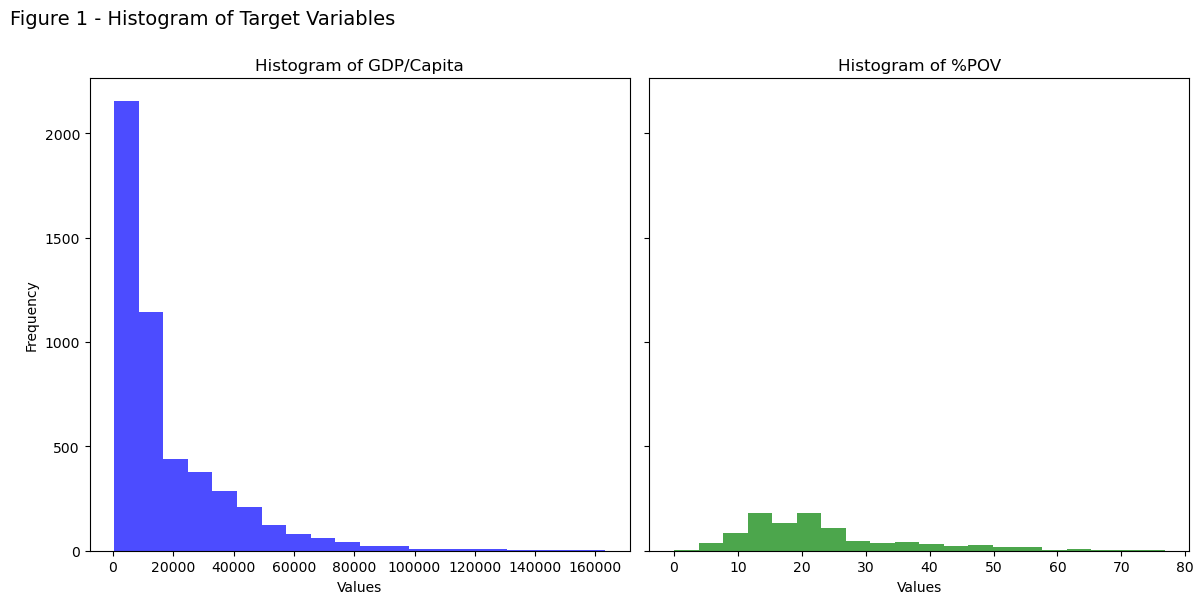

In [135]:
df_economy2 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/df_economy2.csv')

import seaborn as sns
import matplotlib.pyplot as plt

###### create a figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

####### plot histogram for GDP
ax[0].hist(df_economy2['gdp'], bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of GDP/Capita')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

####### plot histogram for %POV
ax[1].hist(df_economy2['%pov'], bins=20, color='green', alpha=0.7)
ax[1].set_title(f'Histogram of %POV')
ax[1].set_xlabel('Values')

fig.suptitle('Figure 1 - Histogram of Target Variables', x=0, y=1, ha='left', fontsize=14)

plt.tight_layout()
plt.show()

**Figure Observation:** Target variables are GDP per capita and % population at poverty line.  The first thing that is apparent is that the target variable for poverty has significantly less data than GDP. This can be seen by comparing the height of each graph (as they share the same y axis, which is frequency of data points per bin). The second observation is that GDP has a distribution shape that is significantly skewed to the right, while % poverty has a distribution shape that is more bell shaped (follows normal distribution) but has a slightly longer tail to the right.

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2dii-graph-cpia'></a>
#### 2dii. Graphical analysis (Histograms of CPIA variables)

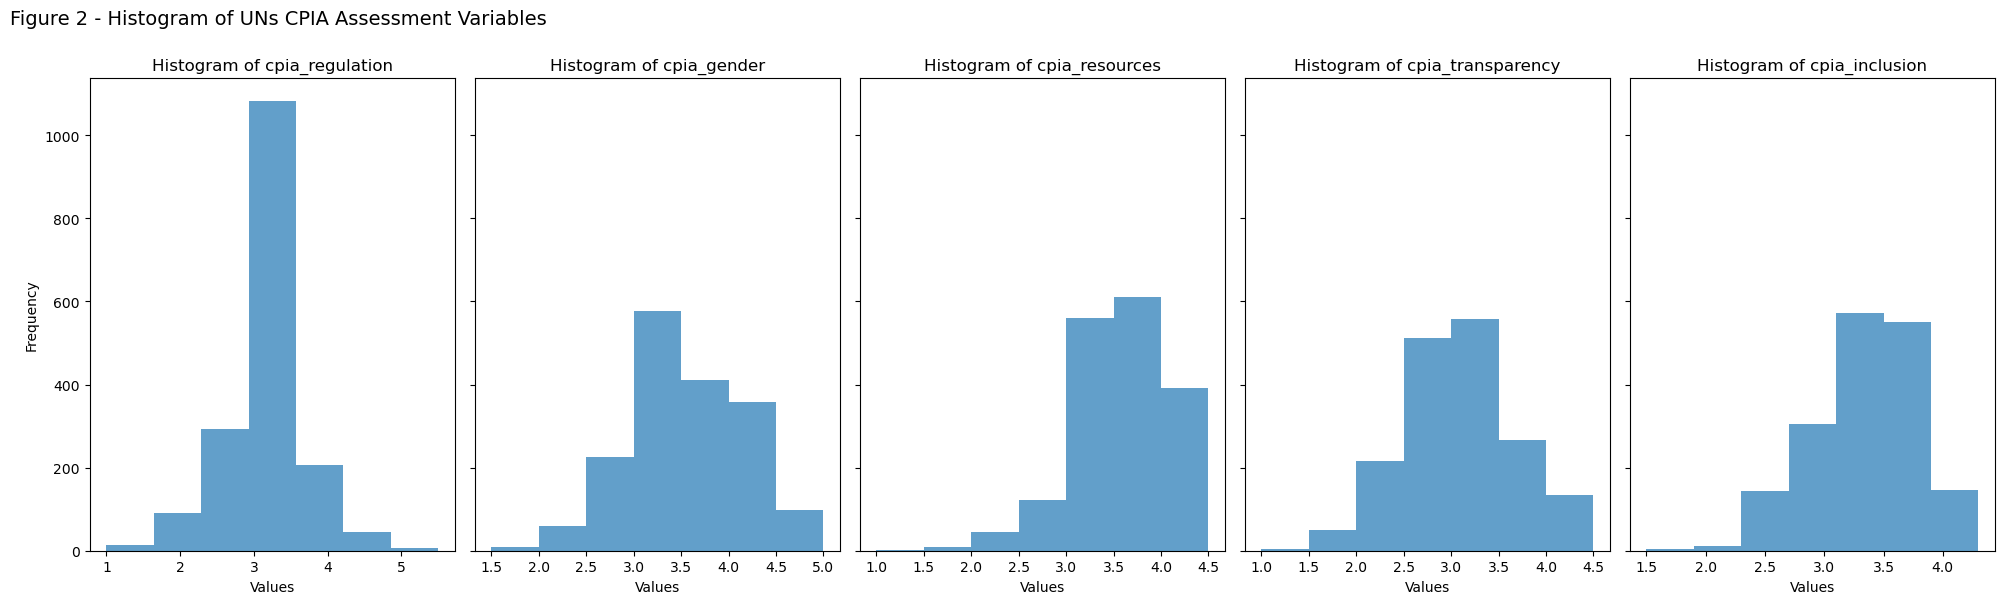

In [136]:
###### create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion']

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 2 - Histogram of UNs CPIA Assessment Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

**Figure Observation:** The first observation is that each of the five variables appear to be more normally distributed than not, although cpia_resourses is slightly skewed to the left. The second observation is that cpia_regulation significantly peaked in the center of the histogram

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2diii-graph-health'></a>
#### 2diii Graphical analysis (Histograms of Health Education and Business variables)

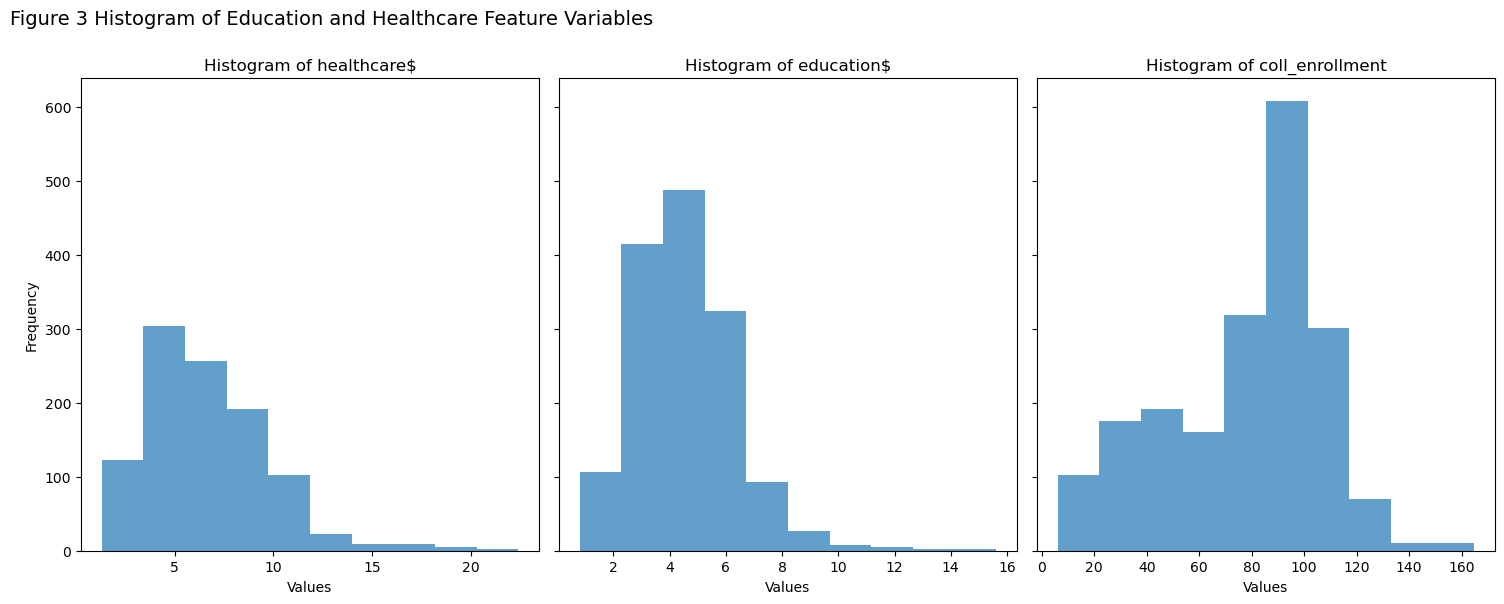

In [137]:
# create a column of variables you want to graph
cols = ['healthcare$', 'education$', 'coll_enrollment']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 3 Histogram of Education and Healthcare Feature Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

**Figure Observations:** The first observation is that the healthcare and education features are more normally distributed than not but are both slightly skewed to the right. The second observation is that coll_enrollment appears to be slightly bimodal (have two groupings of data within one) seen by the two peaks (or modes), but those groups overlap and are not significantly spread apart

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2div-graph-income'></a>
#### 2div. Graphical analysis (Histograms of Income related variables)

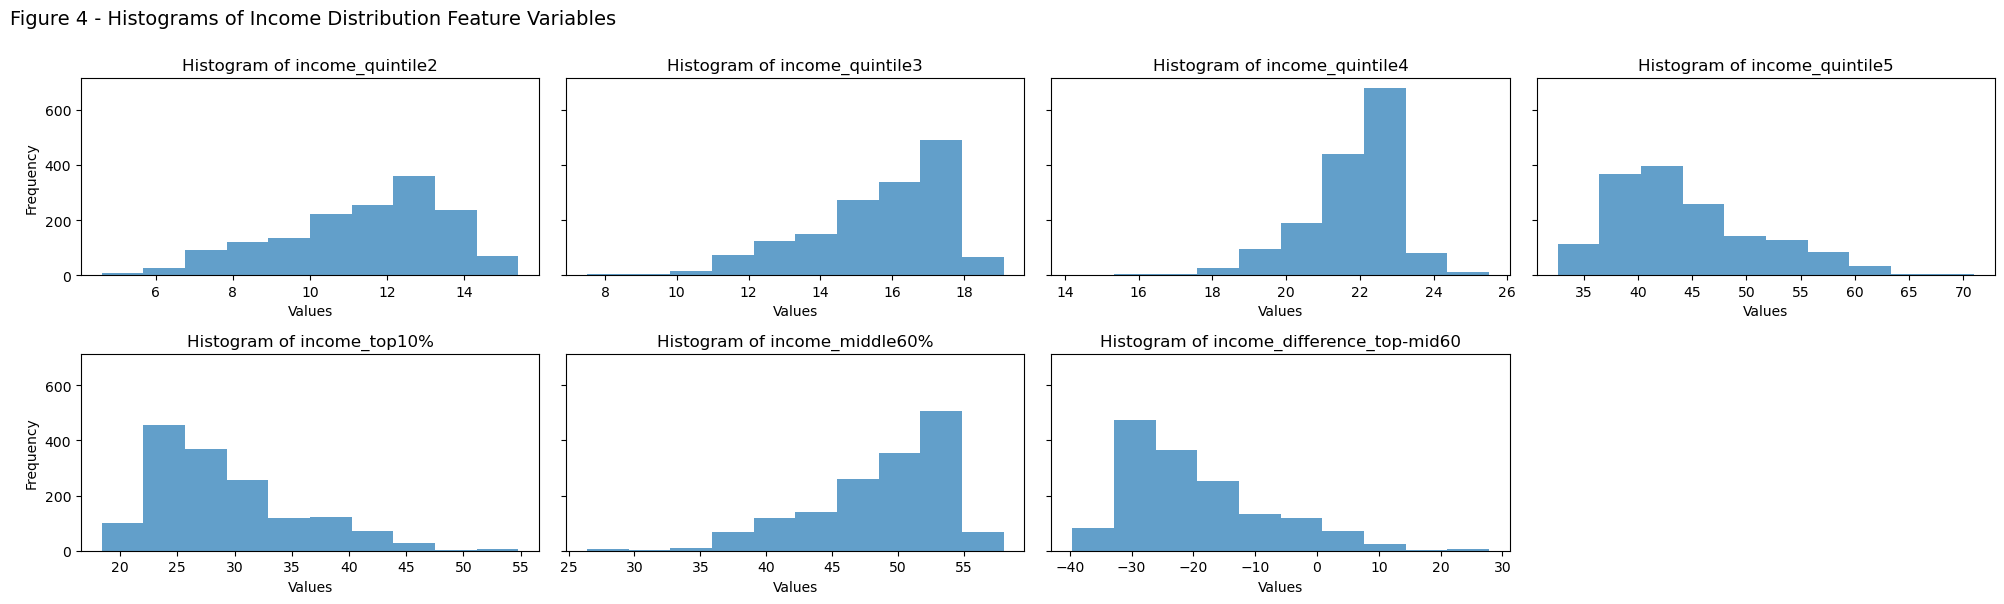

In [138]:
# create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60']

###### create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

####### Flatten the axes array for easy iteration
axes = axes.flatten()

######## plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
####### hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

########## Add a main title
fig.suptitle('Figure 4 - Histograms of Income Distribution Feature Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

**Figure Observations:** The first observation is that quintiles 2, 3, 4 and middle60% are more skewed to the left than they are normally distributed. The second observation is that quintile 5, top10%, and income_difference are more skewed to the right than are normally distributed.

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2dv-graph-trade'></a>
#### 2dv. Graphical analysis (Histograms Trade related variables)

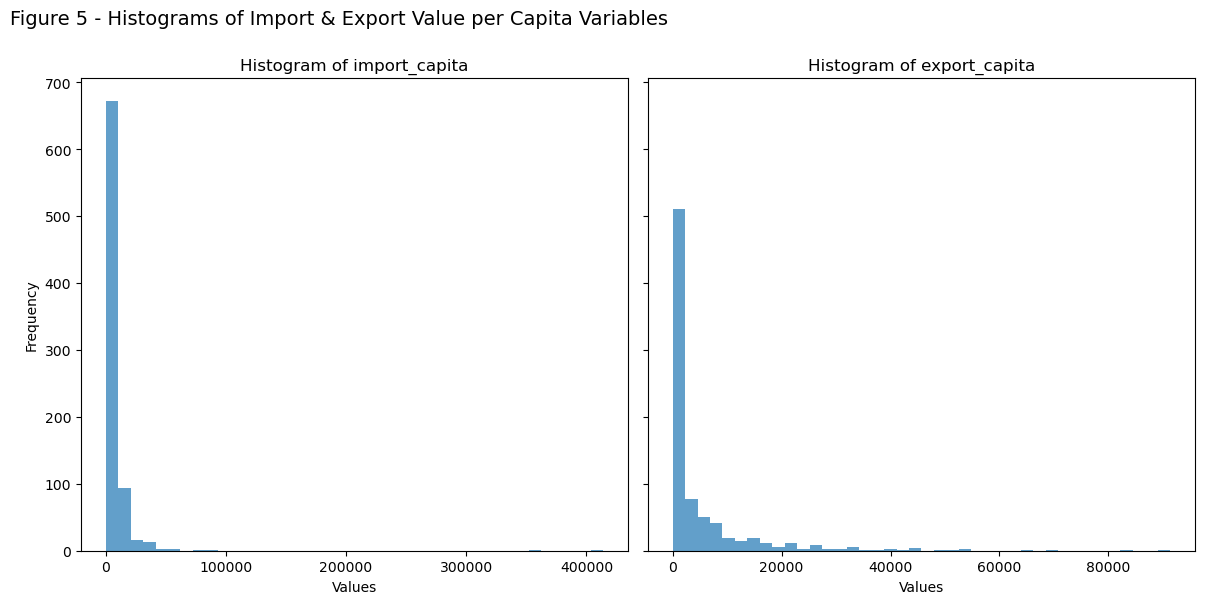

In [139]:
# create a column of variables you want to graph
cols = ['import_capita', 'export_capita']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 5 - Histograms of Import & Export Value per Capita Variables', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

**Figure Observations:** Both import and export per capita histograms show distributions with extreme peaks and right side skewness. Both also show outliers with extreme values relative to the rest of the sample

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2dvi-quint'></a>
#### 2dvi. Graphical analysis (Histograms of Trade related variables binned into quintile values)

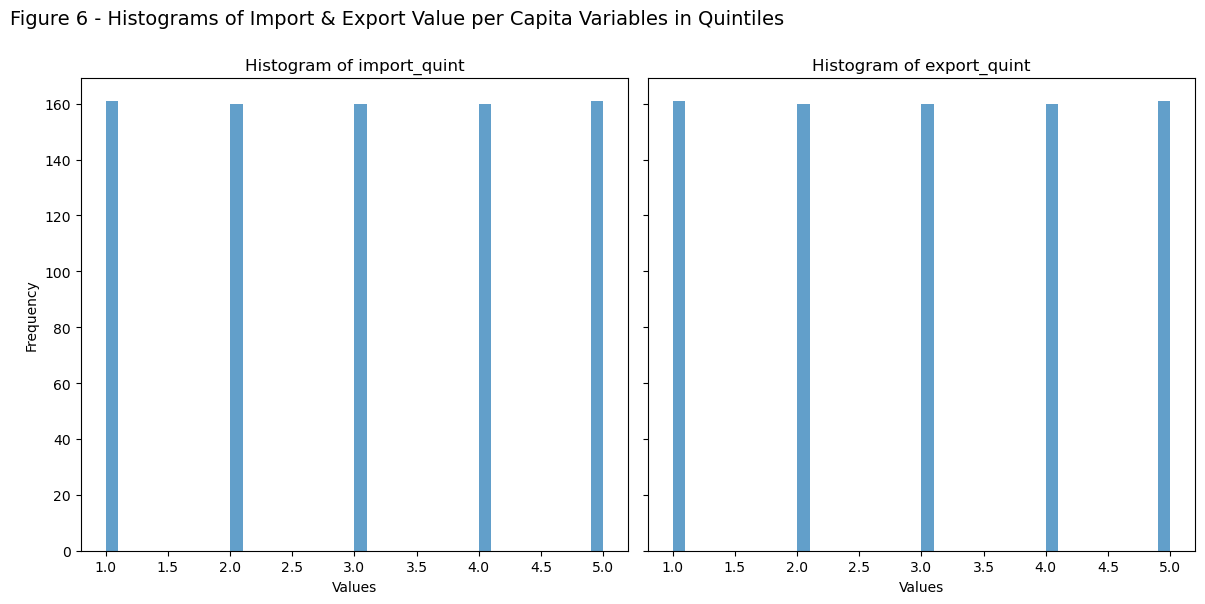

In [140]:
#### bin and re-graph imports and exports

df_economy2['import_quint'] = pd.qcut(df_economy2['import_capita'], q=5, labels=[1,2,3,4,5])
df_economy2['export_quint'] = pd.qcut(df_economy2['export_capita'], q=5, labels=[1,2,3,4,5])

# create a column of variables you want to graph
cols = ['import_quint', 'export_quint']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Figure 6 - Histograms of Import & Export Value per Capita Variables in Quintiles', x=0, y=1, ha='left', fontsize=14)

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

**Figure Observations:** Bars of same height are expected in this plot, given the data was converted into an equal number of quintile bins.

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2e-transform'></a>
### 2e - Data Transformation
As mentioned above one the main reasons that data is reviewed graphically is to understand how missing data in your data set can be handled. The reason for this is that machine learning algorithms require that there be no missing values in the data set. There are a couple of approaches that can be taken to deal with the problem
- only use those rows of data where there is no missing data
- impute the mean within those missing cells - can be used when the actual data is normally distributed
- impute the median (middle most data point in a dataset) within those missing cells - can be used when the actual data is skewed
- impute the mode (most frequently occurring category) - used for categorical data
- Extrapolating predicted points within missing data - can be used when there are known trends or relationships within the dataset

Below further explores missing data in the master dataframe. Those rows that offer no feature information will be dropped, but the master dataframe's name will remain ‘df_economy2’. Also, the number of missing cells for each variable is summarized

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2ei-drop-rows'></a>
#### 2ei. Data Transformation (Dropping non-informative-rows)
One of the challenges in collecting and merging several disparate dataframes is that multiple dataframes within that collection may not share the same sample conditions (e.g. df1 and df2 not having data for the same countries in the same year). This causes several cells within the master dataframe to be missing. As an initial purging of those situations, all rows with less than two feature variables containing data were counted and dropped

In [141]:
''' Check to see how many rows has  less than 2 features feature with information'''
#### columns to check
cols = df_economy2.loc[:, 'cpia_regulation':'export_quint']

#### chech if features are all nan
feature_all_nan = cols.isna().all(axis=1).sum()

#### check rows where only 1 or 2 features has information
one_feature_with_info = cols.isna().sum(axis=1) == (cols.shape[1] - 1)
two_feature_with_info = cols.isna().sum(axis=1) == (cols.shape[1] - 2)

#### count the number of rows where the above condition is met (only one feature with information)
one_feature_count = one_feature_with_info.sum()
two_feature_count = two_feature_with_info.sum()
print('Summary 1 - Number of rows with missing values in all but two feature variables')
print(f'Number of rows where there was no feature information before drop : {feature_all_nan}')
print(f'Number of rows with only one feature having information before drop : {one_feature_count}')
print(f'Number of rows with only two features having information before drop : {two_feature_count}')

Summary 1 - Number of rows with missing values in all but two feature variables
Number of rows where there was no feature information before drop : 769
Number of rows with only one feature having information before drop : 474
Number of rows with only two features having information before drop : 427


**Summary Observation:** 1774 or one third of the rows in the master dataframe had missing values in all but two feature variables

In [142]:
### Drop all rows that dont two or less features with information
df_economy2 = df_economy2[~cols.isna().all(axis=1)]   #### no features with info
df_economy2 = df_economy2[~one_feature_with_info]    #### one features
df_economy2 = df_economy2[~two_feature_with_info]    #### two features
cols2 = df_economy2.loc[:, 'cpia_regulation':'export_quint']

confirm_drop = cols2.isna().all(axis=1).sum()
print('Summary 2 - Confirmation of dropping rows with missing data in all but two feature variables')
print(f'Confirmation -- Number of rows where there two or less features with information after drop : {confirm_drop}')

Summary 2 - Confirmation of dropping rows with missing data in all but two feature variables
Confirmation -- Number of rows where there two or less features with information after drop : 0


In [143]:
nan_counts = df_economy2.isna().sum()
print('Table 15 - Sum of missing values for each variable')
print(nan_counts)
print(f'Total rows in df_economy2 : {len(df_economy2)}')
#df_economy2.to_csv('df_economy2.csv', index=False)

Table 15 - Sum of missing values for each variable
area                              0
year                              0
gdp                               0
%pov                           2376
cpia_regulation                1596
cpia_gender                    1596
cpia_resources                 1596
cpia_transparency              1596
cpia_inclusion                 1601
healthcare$                    2428
education$                     2377
coll_enrollment                2087
income_quintile2               1802
income_quintile3               1802
income_quintile4               1802
income_quintile5               1802
income_top10%                  1802
income_middle60%               1802
income_difference_top-mid60    1802
import_capita                  2533
export_capita                  2533
import_quint                   2533
export_quint                   2533
dtype: int64
Total rows in df_economy2 : 3335


**Table Observation:** Shows the count of missing data in each variable. Greater than 50% of feature variable is still missing

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2eii-missing-strategy'></a>
#### 2eii Data transformation (Missing values strategy)
As noted above more than half of the feature information (data) is missing. After collinearity analysis a strategy to reduce that number further will be explored (as some feature variables may be dropped from the study due to correlation with other features).

Below is the rationale and actions that will be taken to address missing data for each variable

- Target Variable __(gdp)__ - Has no missing variables. ***No action taken***
- Target Variable __(%pov)__ - Has significantly less information than gdp, therefore ***Separation into its own dataset preserves the most information for this target variable***
- Feature __(cpia_regulation)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_gender)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_resources)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_transparency)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_inclusion)__ - Figure 2 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(healthcare)__ - Figure 3 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(education)__ - Figure 3 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(coll_enrollment)__ - Figure 3 shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(income related features)__ - Figure 4 shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***
- Feature __(import_capita)__ - Figure 5 shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***
- Feature __(Export_capita)__ - Figure 5 shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***

These alterations(transformations) will be performed after the collinearity analysis for efficiency purposes

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2eiii-collinearity1'></a>
#### 2eiii. Data Transformation (Collinearity Analysis)
Collinearity Analysis is important because feature variables that are correlated to one another brings redundant information into the study and can obscure understanding of any meaningful relationships between cause and effect that may exist. Below, a color mapped matrix plot of correlation scores was created to determine where there may be significant collinearity. The score used to determine collinearity (pearson coefficient) is a score between -1 and 1. The closer the score is to either of those values the more correlated the variables. The closer the score is to 0 the more likely no correlation exist.

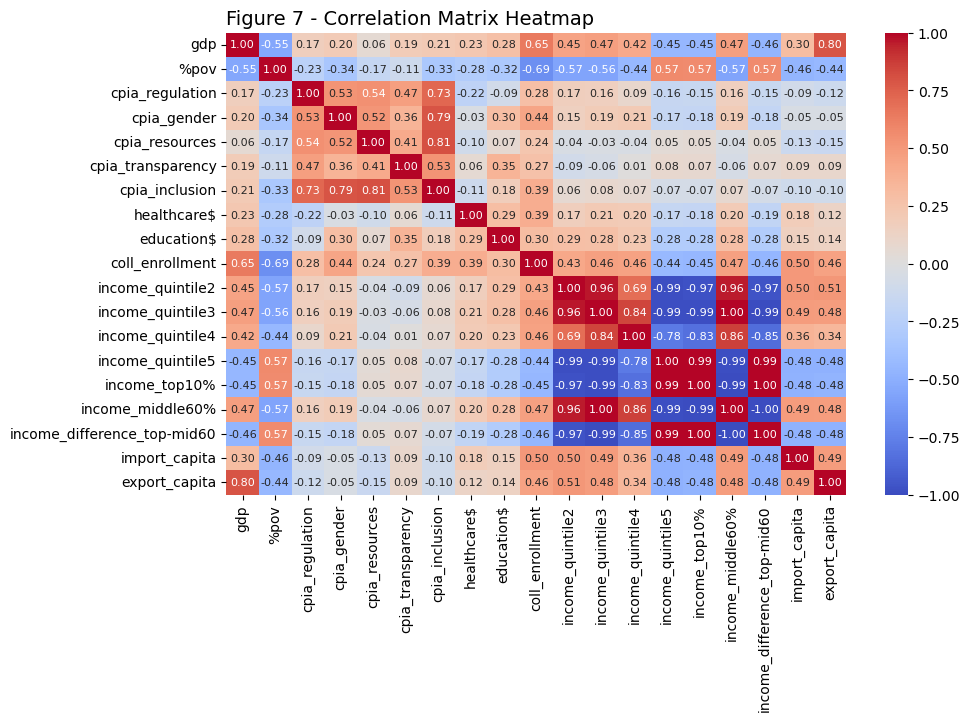

In [144]:
#### create a list of the variables to analyze
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment',
       'income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60', 'import_capita', 'export_capita']

#### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy2[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Figure 7 - Correlation Matrix Heatmap', x=0, y=1, ha='left', fontsize=14)
plt.show()

**Figure Observations:** The first observation that stands out is that all of the income related variables show strong collinearity (correlated with one another). The second observation is that there is moderate collinearity between import, export, and coll_enrollment data. The third observation is that cpia_inclusion has a moderate to strong relationship with the other cpia variables. Other observations show little to no colinearity between the remaining feature variables. There does appear to be moderate correlation between some of the feature variables and the target variables but that is not a problem, as the purpose of the study is to find those potential relationships

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2eiv-drop-correlated'></a>
#### 2eiv. Data transformation  (Dropping correlated features)
It was decided that those income related variables which were strongly correlated be dropped except for one variable 'income_middle60%'. Also cpia_inclusion will also be dropped. All other variables were kept in the master dataframe which will be updated to the name 'df_economy3'.  A follow up collinearity matrix plot was created to determine if additional changes were needed

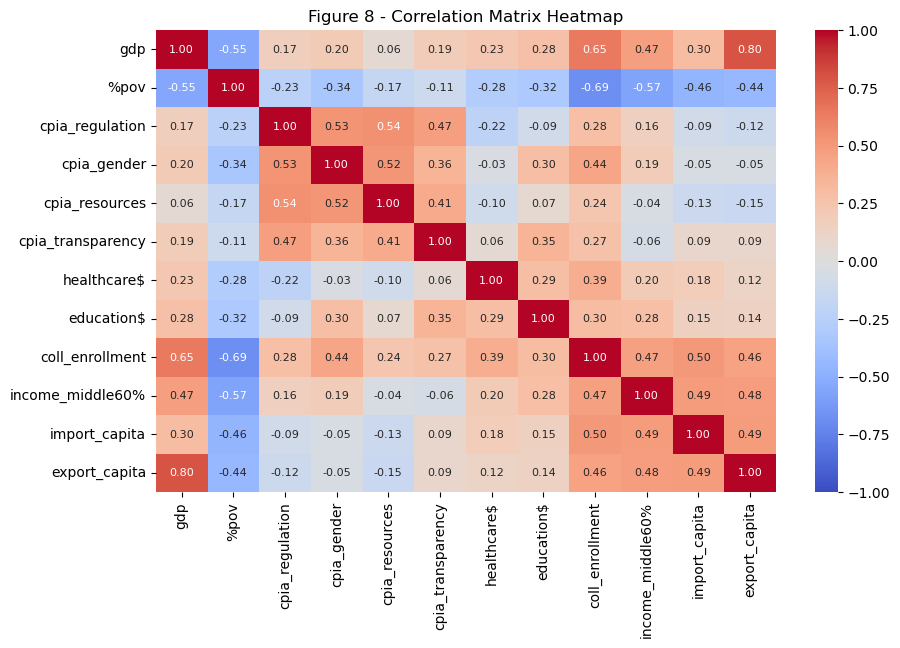

In [146]:
############## drop redundant variables
df_economy3 = df_economy2.drop(columns=['cpia_inclusion','income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_difference_top-mid60'])
#df_economy3


############### repeat updated correlation heatmap
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 
        'income_middle60%', 'import_capita', 'export_capita']

###### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy3[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Figure 8 - Correlation Matrix Heatmap')
plt.show()

**Figure Observations:** Main observation is that there were no changes in colinearity after the above changes were made

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2ev-split-targets'></a>
#### 2ev. Data transformation  (Split master dataframe based on target variables)
As mentioned above because there was significantly less data for the target variable %poverty. The team determined separate %poverty from gdp, to maintain the highest density of actual data for that target variable

In [147]:
### As disussed above separate gdp and pov tables
df_gdp = df_economy3[['area', 'year', 'gdp', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency','healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_quint', 'export_quint']]
df_pov = df_economy3[['area', 'year', '%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_quint', 'export_quint']]

print('Table 16- First five rows of the GDP dataframe after split from master dataframe')
print(df_gdp.head())
print(df_gdp.shape[0], 'Rows ,',df_gdp.shape[1], 'Columns')
print(' ')
print('Table 17- First five rows of the Poverty dataframe after split from master dataframe')
print(df_pov.head())
print(df_pov.shape[0], 'Rows ,',df_pov.shape[1], 'Columns')

Table 16- First five rows of the GDP dataframe after split from master dataframe
          area  year      gdp  cpia_regulation  cpia_gender  cpia_resources  \
4  Afghanistan  2006  1120.89              2.5          2.0             2.5   
5  Afghanistan  2007  1287.06              2.5          2.0             2.5   
6  Afghanistan  2008  1336.21              2.5          2.0             2.5   
7  Afghanistan  2009  1575.32              2.5          2.0             3.0   
8  Afghanistan  2010  1771.20              2.5          2.0             3.0   

   cpia_transparency  healthcare$  education$  coll_enrollment  \
4                2.5          NaN         NaN         29.93046   
5                2.0          NaN         NaN         30.08316   
6                2.0          NaN         NaN         40.22338   
7                2.0          NaN         NaN         46.73276   
8                2.0          8.6     4.51116         53.24683   

   income_middle60% import_quint export_quint  

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2evi-density-gdp'></a>
#### 2evi. Data transformation (Improve density of GDP dataframe)
As acknowledged in the missing values strategy (section 2eii) more than half of the dataframe contains missing values for feature variables. All the rows with at most two feature variables containing values have already been dropped. In this section an assessment of the rows containing a maximum of three, four, then five feature variables containing information will be completed along with the associated information (data) density for each possible dataframe alteration

In [148]:
colsG = df_gdp[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency','healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_quint', 'export_quint']]
#### Identify and count rows with all but 3 features missing values
three_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 3)
three_features_count = three_features_with_data.sum()


#### Identify and count rows with all but 4 features misssing
four_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 4)
four_features_count = four_features_with_data.sum()

#### Identify and count rows with all but 5 features misssing
five_features_with_data = colsG.isna().sum(axis=1) >= (colsG.shape[1] - 5)
five_features_count = five_features_with_data.sum()
print('Summary 4 - Evaluation of GPD data density versus the maximum number of features per row not missing values')
print(f'Number of rows with all but three features missing values : {three_features_count}')
print(f'Number of rows with all but four features missing values : {four_features_count}')
print(f'Number of rows with all but five features missing values : {five_features_count}')
#### Drop rows with only four features containing data
df_gdp3 = df_gdp[~three_features_with_data]
df_gdp4 = df_gdp[~four_features_with_data]
df_gdp5 = df_gdp[~five_features_with_data]

#### Calculate the percentage of nan values
nan_percentage_three = df_gdp3.isna().sum().sum() / df_gdp3.size * 100
nan_percentage_four = df_gdp4.isna().sum().sum() / df_gdp4.size * 100
nan_percentage_five = df_gdp5.isna().sum().sum() / df_gdp5.size * 100

print(f'Percentage of cells in the GDP dataframe that contain values (df has at least 3 features/row with data) : {100 - nan_percentage_three}')
print(f'Number of rows in dataframe df_gdp3 after drop  : {len(df_gdp3)}')
print(f'Percentage of cells in the GDP dataframe that contain values (df has at least 4 features/row with data) : {100 - nan_percentage_four}')
print(f'Number of rows in dataframe df_gdp4 after drop : {len(df_gdp4)}')
print(f'Percentage of cells in the GDP dataframe that contain values(df has at least 5 features/row with data) : {100 - nan_percentage_five}')
print(f'Number of rows in dataframe df_gdp5 after drop : {len(df_gdp5)}')

Summary 4 - Evaluation of GPD data density versus the maximum number of features per row not missing values
Number of rows with all but three features missing values : 1348
Number of rows with all but four features missing values : 2245
Number of rows with all but five features missing values : 2680
Percentage of cells in the GDP dataframe that contain values (df has at least 3 features/row with data) : 62.58371723897642
Number of rows in dataframe df_gdp3 after drop  : 1987
Percentage of cells in the GDP dataframe that contain values (df has at least 4 features/row with data) : 69.7741707833451
Number of rows in dataframe df_gdp4 after drop : 1090
Percentage of cells in the GDP dataframe that contain values(df has at least 5 features/row with data) : 75.24368761009983
Number of rows in dataframe df_gdp5 after drop : 655


**Summary Observation:** Dropping the rows where all but five feature variable have missing variables yields a data frame where only 25% of the data is missing.

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2evii-impute-gdp'></a>
#### 2evii. Data transformation (Data imputation of missing GDP values)
In section 2evi it was observed that dropping rows with missing values in all but 5 feature variables, creates the highest data density (75%). However, this would drop significant information for non CPIA variables (which there are 4) as much of the CPIA variables are aggregated and are weighted in detail toward non-western countries.  As a result, the team determined to use the dataframe where a minimum of 3 variables contain information 'df_gdp3' (data density of 62%) to maintain diversity of information. Per the rationale above in section 2eii (Missing value strategy) we will impute missing data for each of the feature variables within the GDP dataframe with either the variable's mean or median

In [149]:
from sklearn.impute import SimpleImputer
'''
Complete missing data imputation for gdp data
per the decisions made above in section 2.3.6a
'''
### Define features to be imputed with mean or median
mean_impute_cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment']
median_impute_cols = ['income_middle60%', 'import_quint', 'export_quint']

### Initiate imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

### Impute columns per imputation strategy
df_gdp3[mean_impute_cols] = mean_imputer.fit_transform(df_gdp3[mean_impute_cols])
df_gdp3[median_impute_cols] = median_imputer.fit_transform(df_gdp3[median_impute_cols])

### Confirm imputation eliminated nan
nan_count_gdp = df_gdp3.isna().sum()
print('Table 18 - Confirmation all missing cells were imputed')
print(f'NaN Elimination Confirmation - Number of NaN records per variable : {nan_count_gdp}')
print(" ")
print('Table 19 - First five rows of the dataframe df_gdp3 after imputation to address missing data')
print(df_gdp3.head())
print(df_gdp3.shape[0], 'Rows ,',df_gdp3.shape[1], 'Columns')

Table 18 - Confirmation all missing cells were imputed
NaN Elimination Confirmation - Number of NaN records per variable : area                 0
year                 0
gdp                  0
cpia_regulation      0
cpia_gender          0
cpia_resources       0
cpia_transparency    0
healthcare$          0
education$           0
coll_enrollment      0
income_middle60%     0
import_quint         0
export_quint         0
dtype: int64
 
Table 19 - First five rows of the dataframe df_gdp3 after imputation to address missing data
          area  year      gdp  cpia_regulation  cpia_gender  cpia_resources  \
4  Afghanistan  2006  1120.89              2.5          2.0             2.5   
5  Afghanistan  2007  1287.06              2.5          2.0             2.5   
6  Afghanistan  2008  1336.21              2.5          2.0             2.5   
7  Afghanistan  2009  1575.32              2.5          2.0             3.0   
8  Afghanistan  2010  1771.20              2.5          2.0             3.0

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2eviii-density-pov'></a>
#### 2eviii. Data transformation (Improve data density of Poverty dataframe)
In this section we repeat the analysis performed in section 2evi, but for the Poverty dataframe

In [150]:
### Drop rows with no %pov data
df_pov = df_pov.dropna(subset=['%pov'])

colsP = df_pov[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency','healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_quint', 'export_quint']]
#### Identify and count rows with all but 3 features missing values
three_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 3)
three_features_count = three_features_with_data.sum()


#### Identify and count rows with all but 4 features misssing
four_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 4)
four_features_count = four_features_with_data.sum()

#### Identify and count rows with all but 5 features misssing
five_features_with_data = colsP.isna().sum(axis=1) >= (colsP.shape[1] - 5)
five_features_count = five_features_with_data.sum()
print('Summary 5 - Evaluation of Poverty data density versus the maximum number of features per row not missing values')
print(f'Number of rows in df_pov with all but three features missing values : {three_features_count}')
print(f'Number of rows in df_pov with all but four features missing values : {four_features_count}')
print(f'Number of rows in df_pov with all but five features missing values : {five_features_count}')
#### Drop rows with only four features containing data
df_pov3 = df_pov[~three_features_with_data]
df_pov4 = df_pov[~four_features_with_data]
df_pov5 = df_pov[~five_features_with_data]

#### Calculate the percentage of nan values
nan_percentage_three = df_pov3.isna().sum().sum() / df_pov3.size * 100
nan_percentage_four = df_pov4.isna().sum().sum() / df_pov4.size * 100
nan_percentage_five = df_pov5.isna().sum().sum() / df_pov5.size * 100

print(f'Percentage of cells in the Poverty dataframe that contain values (df has at least 3 features/row with data) (df has at least 3 features/row with data) : {100 - nan_percentage_three}')
print(f'Number of rows in dataframe df_pov3 after drop  : {len(df_pov3)}')
print(f'Percentage of cells in the Poverty dataframe that contain values (df has at least 4 features/row with data) (df has at least 4 features/row with data) : {100 - nan_percentage_four}')
print(f'Number of rows in dataframe df_pov4 after drop : {len(df_pov4)}')
print(f'Percentage of cells in the GDP dataframe that contain values (df has at least 5 features/row with data) (df has at least 5 features/row with data) : {100 - nan_percentage_five}')
print(f'Number of rows in dataframe df_pov5 after drop : {len(df_pov5)}')

Summary 5 - Evaluation of Poverty data density versus the maximum number of features per row not missing values
Number of rows in df_pov with all but three features missing values : 644
Number of rows in df_pov with all but four features missing values : 717
Number of rows in df_pov with all but five features missing values : 799
Percentage of cells in the Poverty dataframe that contain values (df has at least 3 features/row with data) (df has at least 3 features/row with data) : 66.91086691086691
Number of rows in dataframe df_pov3 after drop  : 315
Percentage of cells in the Poverty dataframe that contain values (df has at least 4 features/row with data) (df has at least 4 features/row with data) : 70.85187539732995
Number of rows in dataframe df_pov4 after drop : 242
Percentage of cells in the GDP dataframe that contain values (df has at least 5 features/row with data) (df has at least 5 features/row with data) : 75.625
Number of rows in dataframe df_pov5 after drop : 160


**Summary Observation:** Similar percentage changes to the GDP dataframe with the dataframe with 5 features/row having the highest density of 75%. Also sample size is at best a third of the pre-altered dataframes sample size.

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2eix-impute-pov'></a>
#### 2eix. Data transformation (Data imputation of Poverty missing values)
Similar to the GDP dataframe, the dataframe with at least 3 features/row containing values will be used to minimize missing values while maintaining diversity in feaure information. Also, the mean or median will be imputed into missing values for the Poverty dataframe based the missing data strategy listed in 2eii

In [151]:
### Define features to be imputed with mean or median
mean_impute_cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment']
median_impute_cols = ['income_middle60%', 'import_quint', 'export_quint']

### Initiate imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

### Impute columns per missing data strategy
df_pov3[mean_impute_cols] = mean_imputer.fit_transform(df_pov3[mean_impute_cols])
df_pov3[median_impute_cols] = median_imputer.fit_transform(df_pov3[median_impute_cols])

### Confirm imputation eliminated nan
nan_count_pov = df_pov3.isna().sum()
print('Table 20 - Confirmation all missing cells were imputed for df_pov')
print(f'NaN Elimination Confirmation - Number of NaN records per variable : {nan_count_pov}')
print(" ")
print('Table 21 - First five rows of the dataframe df_pov3 after imputation to address missing data')
print(df_pov3.head())
print(df_pov3.shape[0], 'Rows ,',df_pov3.shape[1], 'Columns')

Table 20 - Confirmation all missing cells were imputed for df_pov
NaN Elimination Confirmation - Number of NaN records per variable : area                 0
year                 0
%pov                 0
cpia_regulation      0
cpia_gender          0
cpia_resources       0
cpia_transparency    0
healthcare$          0
education$           0
coll_enrollment      0
income_middle60%     0
import_quint         0
export_quint         0
dtype: int64
 
Table 21 - First five rows of the dataframe df_pov3 after imputation to address missing data
            area  year  %pov  cpia_regulation  cpia_gender  cpia_resources  \
5    Afghanistan  2007  33.7         2.500000     2.000000        2.500000   
9    Afghanistan  2011  38.3         2.500000     2.000000        3.000000   
14   Afghanistan  2016  54.5         2.500000     1.500000        3.000000   
71       Albania  2005  18.5         3.500000     4.000000        3.500000   
202    Argentina  2021  37.3         3.343284     3.512438        3.5

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2ex-quint-pov'></a>
#### 2ex. Data transformation (Change datatype of Import and Export value categories to ordinal)
In the graphical analysis for import and export values the shape of the data was peaked with extreme outliers. It was determined to change them into quintiles, but not to convert to in integer at that time because to do so would have required changing the missing values to a value as well, hence losing the opportunity to maximize information density by reducing those missing values from the study. In this section both import and export per capita quintiles have been converted to integers to give them both magnitude and direction

In [152]:
#### change the datatype for import and export in the gdp dataframe
df_gdp['import_quint'] = df_gdp['import_quint'].cat.codes.replace(-1, 3)
df_gdp['export_quint'] = df_gdp['export_quint'].cat.codes.replace(-1, 3)

#### repeat the process for poverty dataframe
df_pov['import_quint'] = df_pov['import_quint'].cat.codes.replace(-1, 3)
df_pov['export_quint'] = df_pov['export_quint'].cat.codes.replace(-1, 3)

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='2f-summary-preparation'></a>
### 2f. Summary of Data Preparation
The purpose of the data preparation stage is to clean, restructure, merge and transform all the individual datasets into a single dataframe to be effectively modelled with machine learning algorithms. The following is a summary of the significant steps taken to create the master dataframes df_gdp, and df_pov:
1. Completed the following steps for all uploaded dataframes:    
    a. Dropped all dataframe footer and/or header information    
    b. Removed all whitespace characters    
    c. Dropped all non-informative columns    
    d. Standardized and lower-cased all column names    
    e. Restructured all dataframes to a wide-form format, with target and feature variables aligned in adjacent columns, with the first two columns being 'area', 'year'(keys to merge on)    
2. For Income related dataframes - Merged each quintile dataframe into one, aligning each variable adjacently on the keys('area', 'year'). Also engineered the new features, 'income_middle60', and 'income_difference_top-mid60'
3. For Trade related dataframes - Reformatted individual dataframes from long-form to wide-form, merged individual dataframes, and engineered two new features, import per capita, and export per capita
4. Merged all previously prepared dataframes into one, 'df_economy', on the columns 'area', and 'year'
5. Master dataframe - Eliminated duplicate area name categories (b/c of naming convention differences) and aligned all feature data on standardized area names
6. Master dataframe - Dropped all rows from where area names where non geographical categories(e.g. High Income, Low poverty, etc). Revised dataframe name to 'df_economy2'
7. Master dataframe - Dropped all features where there was strong collinearity between features. Revised dataframe name to 'df_economy3'
8. Master dataframe - Split 'df_economy' master dataframe in to two. One for each target variable - 'df_gdp', 'df_pov'
9. Dropped all rows in both ‘df_gdp’, and ‘df_pov’ dataframes, where at most only four feature variables contained values (Increased data density from ~35% to ~70% for both)
10. Imputed mean or median values into each feature variable's missing data cells (for both df_gdp, and df_pov) based on the the missing data strategy
11. Converted import and export data from dollar amounts to quintile ordinal values

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3-model'></a>
## 3. Data Modelling
Data modelling uses machine learning algorithms to create a mathematical representation of patterns in some specified dataset of interest. It involves training (also called fitting) a machine learning model (algorithm) to some historical data in order to learn relationships between feature (input) variables and target (outcome) variables. It can then make predictions about new (unseen & untrained) data based on what it 'learned' from the trained dataset. With the assumption that the dataframe has been properly prepared, machine Learning modelling includes the following steps:
1. Data preprocessing - Splitting the target and feature variables into separate dataframes
2. Model Selection - Choosing the appropriate algorithm (model) for the analysis
3. Training - Fitting the model to the data by optimizing model parameters
4. Evaluation - Measuring the performance of the model
5. Prediction & Deployment - Using the model in real-world decision making (The scope of this project is to provide insights only)

Because there are two target variables ('gdp', '%pov') of different sample size, The modelling process for the two will be performed separately

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3a-preprocessing'></a>
### 3a. Data Preprocessing
Per the previous section the data has been prepared to be used in machine learning modelling. However there a few final steps necessary before training and fitting the data in a model. 
1. The models distinguish between target variables and feature variables, so they will be split into separate dataframes for both GDP and Poverty
2. For simplicity, the target variable will be transformed from continuous data types to categories (or classes, e.g. High Poverty, Low Poverty versus a percentage)

<a id='3ai-target-feature-split-gdp'></a>
#### 3ai. Data preproceessing {Separate target and feature variables for GDP}

In [153]:
########### separate target variables from feature variables
df_gdp3.reset_index(drop=True, inplace=True)
gdp = df_gdp3[['gdp']]
features = df_gdp3[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_quint', 'export_quint']]
print('Table 22 - First five rows to the gdp target dataframe')
print(gdp.head())
print(f'Number of rows in df : {len(gdp)}')
print('')
print('Table 23 - First five rows to the gdp features dataframe')
print(features.head())
print(f'Number of rows in df : {len(features)}')

Table 22 - First five rows to the gdp target dataframe
       gdp
0  1120.89
1  1287.06
2  1336.21
3  1575.32
4  1771.20
Number of rows in df : 1987

Table 23 - First five rows to the gdp features dataframe
   cpia_regulation  cpia_gender  cpia_resources  cpia_transparency  \
0              2.5          2.0             2.5                2.5   
1              2.5          2.0             2.5                2.0   
2              2.5          2.0             2.5                2.0   
3              2.5          2.0             3.0                2.0   
4              2.5          2.0             3.0                2.0   

   healthcare$  education$  coll_enrollment  income_middle60%  import_quint  \
0     6.301402    4.509216         29.93046              49.2           2.0   
1     6.301402    4.509216         30.08316              49.2           2.0   
2     6.301402    4.509216         40.22338              49.2           2.0   
3     6.301402    4.509216         46.73276             

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3aii-identify-class-gdp'></a>
#### 3aii. Data preprocessing  (Identify classification levels for GDP variable)
The GDP target variable from 'df_gdp' is of data type float. Although this type of data can be modeled, the goal and scope of this project is to find those features that have an influence on GDP in general. Working with the client and team, it was determined to transform target values into binary classes (high and Low GDP). The 33rd, 50th and 67th percentile of the GDP data was calculated to guide the classification split decision

In [154]:
########### get percentile values for gdp
gdp_percentile_33 = np.nanpercentile(gdp, 33)
gdp_percentile_50 = np.nanpercentile(gdp, 50)
gdp_percentile_67 = np.nanpercentile(gdp, 67)

print('Summary 6 - 33rd, 50th, and 67th percentile values for gdp data')
print(f'The value in which 1/3 of gdp data falls below: {gdp_percentile_33}')
print(f'The value in which half of gdp data falls below:{gdp_percentile_50}')
print(f'The value in which 2/3 of gdp data falls below: {gdp_percentile_67}')

Summary 6 - 33rd, 50th, and 67th percentile values for gdp data
The value in which 1/3 of gdp data falls below: 3154.9458
The value in which half of gdp data falls below:4550.97
The value in which 2/3 of gdp data falls below: 8123.273800000001


[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3aiii-class-gdp'></a>
#### 3aiii. Data preprocessing (Set classification levels for GDP variable)
Based on the data from Summary 6 and the current economic situation of Country23, the decision was made to split the data at a GDP threshold of $5000 per capita, with Low GDP represented by 0, and High GDP represnted by 1 (known as the positive class in data science parlance since it is the class of most import, or interest)

In [155]:

########### create classification criteria/conditions and associated class assingments for gdp
gdp_conditions = [
    gdp['gdp'] < 5000,
    gdp['gdp'] >=5000
]
gdp_choices = [0,1]  ########## class assignment

######### create a new column with gdp class values
gdp['gdp_class'] = np.select(gdp_conditions, gdp_choices, default=np.nan)

'''
For the purposes of simplicity and study comprehension y target
variables will be separate series y_gdp and y_pov
'''
y_gdp = gdp['gdp_class']
value_counts = gdp['gdp_class'].value_counts()
print('Summary 7 - Number of values in class 0 and class 1')
print(f'Value Counts per Class : {value_counts}')


Summary 7 - Number of values in class 0 and class 1
Value Counts per Class : 0.0    1060
1.0     927
Name: gdp_class, dtype: int64


**Summary Observations:** The above shows that the positive class has slightly less instances due to the split not being exactly at the 50th percentile mark

[Return to Table of Contents](#1c.-Table-of-Contents)   
<a id='3aiv-target-feature-separation-pov'></a>
#### 3aiv. Data preprocessing (Separate target and feature variables for Poverty)
Similar to GDP, the Poverty dataframe was split into separate target and feature dataframes

In [156]:
df_pov.reset_index(drop=True, inplace=True)
pov = df_pov3[['%pov']]
features_pov = df_pov3[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_quint', 'export_quint']]
print('Table 24 - First five rows to the pov target dataframe')
print(pov.head())
print(f'Number of rows in df : {len(pov)}')
print('')
print('Table 25 - First five rows to the pov features dataframe')
print(features_pov.head())
print(f'Number of rows in df : {len(features_pov)}')

Table 24 - First five rows to the pov target dataframe
     %pov
5    33.7
9    38.3
14   54.5
71   18.5
202  37.3
Number of rows in df : 315

Table 25 - First five rows to the pov features dataframe
     cpia_regulation  cpia_gender  cpia_resources  cpia_transparency  \
5           2.500000     2.000000        2.500000           2.000000   
9           2.500000     2.000000        3.000000           2.000000   
14          2.500000     1.500000        3.000000           2.000000   
71          3.500000     4.000000        3.500000           3.000000   
202         3.343284     3.512438        3.564677           2.873134   

     healthcare$  education$  coll_enrollment  income_middle60%  import_quint  \
5       6.493023    4.481457        30.083160              48.9           3.0   
9       6.493023    4.087910        54.616180              48.9           3.0   
14      6.493023    4.481457        73.056087              48.9           3.0   
71      5.700000    3.238720        76.8870

[Return to Table of Contents](#1c.-Table-of-Contents)   
<a id='3av-identify-class-pov'></a>
#### 3av. Data preprocessing (Identify classification levels for Poverty variable)
Similar to GDP, the 33rd, 50th, and 67th percentile was calculated for Poverty data

In [157]:
########### get percentile values for pov
pov_percentile_33 = np.nanpercentile(pov, 33)
pov_percentile_50 = np.nanpercentile(pov, 50)
pov_percentile_67 = np.nanpercentile(pov, 67)

print('Summary 8 - 33rd, 50th, and 67th percentile values for pov data')
print(f'The value in which 1/3 of pov data falls below: {pov_percentile_33}')
print(f'The value in which half of pov data falls below:{pov_percentile_50}')
print(f'The value in which 2/3 of pov data falls below: {pov_percentile_67}')

Summary 8 - 33rd, 50th, and 67th percentile values for pov data
The value in which 1/3 of pov data falls below: 21.662
The value in which half of pov data falls below:26.4
The value in which 2/3 of pov data falls below: 35.54200000000002


[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3avi-class-pov'></a>
#### 3avi. Data preprocessing (Set classification levels for Poverty variable)
Based on the data from Summary 8 and the current economic situation of Country23, the decision was made to split the data at a Poverty threshold of 25%, with Low Poverty represented by 1 (Different from GDP because in this case the lower value is of more interest), and High Poverty represnted by 0

In [158]:
########### create classification criteria/conditions and associated class assingments for pov
pov_conditions = [ pov['%pov'] < 25,
    pov['%pov'] >=25
]
pov_choices = [1,0]  ########## class assignment

######### create a new column with pov class values
pov['pov_class'] = np.select(pov_conditions, pov_choices, default=np.nan)

'''
For the purposes of simplicity and study comprehension y target
variables will be separate series y_pov
'''
y_pov = pov['pov_class']
value_counts = pov['pov_class'].value_counts()
print('Summary 9 - Number of values in poverty class 1 and class 0')
print(f'Value counts per poverty class : {value_counts}')

Summary 9 - Number of values in poverty class 1 and class 0
Value counts per poverty class : 0.0    171
1.0    144
Name: pov_class, dtype: int64


**Summary Observation:** Class 1 (Low Poverty) has slightly less instances then 0, because the determined split was not at the 50th percentile

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3b-model-overview'></a>
### 3b. Model Selection and Result Interpretation
Three models were used in this study to gain an understaning of which features impacted the target variables. This section provides an understanding of the rationale behind selecting those models. It also provides a high level understanding of how the results of the machine learning models should be interpreted 

[Return to Table of Contents](#1c.-Table-of-Contents)   
<a id='3bi-model-selection'></a>
#### 3bi. Model selection and result interpretation (Model selection)
Considering the project goal, and customers expectations allows for the appropriate model(s) for the study to be selected. There are several things in general to consider when selecting the right machine learning model. Some of the key factors are:
1. Comprehension of results - How easy the model's results are to interpret, and understand
2. Computational demand - How much computer power is needed to produce the model's result (speaks to the sophistication of the model)
3. Data type - Whether the module is more conducive to train continuous or categorical data types
4. Data size capability - Whether the model is more conducive to train small, medium, or large datasets
5. Accuracy and performance - How well the model makes predictions on unseen data
6. Noise robustness - The model’s ability to maintain prediction accuracy despite having noise or corrupted values in the dataset

A matrix was created to review the above criteria against some typical machine learning models - [Model Selection Matrix](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fmodel_selection_matrix.xlsx&wdOrigin=BROWSELINK). Based on the review of the matrix and discussions with the client, it was determined that comprehension of the results, and accuracy/performance were of the highest priorities.  With that, the following models were selected:
1. Logistic Regression - Model that predicts the probability input values belong to a particular outcome class, by using a mathematical function (sigmoid function)
2. Decision Trees - Model that makes predictions based on splitting the data on different input conditions. The concept is akin to the prediction game '21 questions'. (e.g. think of the model asking to split the input variable ‘Import’ at the level $25,000,000. The model might inform you that above that level, 1000 instances returned a target variable result of ‘High GDP’, and 3000 instances were returned as ‘Low GDP’). The output looks like an inverted tree, hence the name
3. Random Forest – Is similar in concept to Decision Tree modelling, but it builds multiple decision trees of various conditions randomly, which allows it to generalize better than decision trees with the cost being slightly more complexity, and computational demand

[Return to Table of Contents](#1c.-Table-of-Contents)   
<a id='3bii-model-interpretation'></a>
#### 3bii. Model selection and result interpretation (Model result interpretation)
There are several metrics that are evaluated to determine the performance of the model. They are as follows:

**Accuracy** - Measures **overall correctness** of the model
- Equation - (# of correct predictions)/ (total # of predictions)
- Usually, a sufficient indicator when class outcomes are distributed evenly (e.g. 899 class A, 950 class B)
    
**Precision** - Measures how well your model **predicts the positive class**
- Equation - (# of correct positive predictions)/ (total # of positive predictions)
- Emphasized when falsely predicting a positive test outcome is most critical. The higher the precision score the lower the chance of making a Type I error (**False Alarm**)
    - Practical example - Concluding the features a, b, and c have a significant and consequential impact on GDP and poverty, but in reality, they do not. Financial, mental, and emotional capital is spent making changes to the country’s policies with no impact to the country's economic conditions
        
**Recall** - Measures the model’s ability to **identify actual positive outcomes**
- Equation - (# of correct positive predictions) / (total # of actual positive outcomes)
- Emphasized when missing the opportunity to catch the positive class is most critical. The higher the recall score the lower the chance of making a Type II error (**Missed Opportunity**)
    - Practical example - Concluding that none of the features had a significant impact even though one or more of the factors did have a significant and consequential impact on either GDP, poverty, or both. Client walks out disappointed without insights to make favorable changes
        
**AUC** (Area under the curve) Overall measure of how well the model distinguishes between the classes being tested
- Mathematical understanding - probability a randomly chosen positive instance is ranked higher than a randomly chosen negative instance (how often the model correctly ranks positive classes above negative ones)
- Used as and overriding measure of the model performance. Especially useful when outcome classes are unbalanced (e.g. 100000 class A, 350 class B)

Based on the above explanation of the performance measures, it appears that a false alarm from this study would be of a more significant negative consequence to the client. Since this Type I error could lead to wasted financial and policy decisions **Precision** and **AUC** will be prioritized when evaluating model performance

All of the measures will return value between 0 and 1 (e.g. precision = 0.89) where the higher the value the better the score

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3c-model-execution'></a>
### 3c Data Modelling Execution
For each of the models, the basic steps that will be taken are as follows:
1. Split the dataset into a training dataset and test dataset (each will have its own 'seed value', so the results can be repeated on the same train, test split)
2. Determine the best model parameters to use (where you see the terms pipeline and grid). The final notebook version may not capture all the parameters that were trained and tested (but those parameters will be commented on)
3. Initiate the model and train the dataset with it using the 'preferred' model parameters
4. Evaluate the model’s performance (as explained above in 3bii)
5. Display the most influential (or important) feature variables on the target variable

This process will be performed for each model on the target variable gdp, then repeated for each model on the target variable %pov

[Return to Table of Contents](#1c.-Table-of-Contents)
<a id='3ci-model1-gdp'></a>
#### 3ci. Data modelling execution (Logistic Regression model of GDP variable)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict

### Capture feature names before turing df into an array
feature_names = features.columns

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=0)

### Need to create a pipeline in order to combine polynomial features with logistic regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression())
])

### Define parameter grid for grid search
param_grid = {
    'log_reg__C': [100, 1000],
    'log_reg__solver': ['liblinear', 'saga'],
    'log_reg__penalty': ['l1', 'l2'],
    'poly__degree': [1]
}

### Initialize gridsearchcv with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

### Perform gridsearch
grid_search.fit(X_train, y_train)

### Display best paramaters and cross val score
print('Summary 10 - Performance metrics for the best Logistic Regression model')
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation-score: {grid_search.best_score_}')

### Make predictions in order to get predictions for evaluations
y_test_pred = grid_search.best_estimator_.predict(X_test)
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display Summary Statistics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')

Summary 10 - Performance metrics for the best Logistic Regression model
Best parameters: {'log_reg__C': 100, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear', 'poly__degree': 1}
Best cross-validation-score: 0.7646251215205444
Accuracy on the test set : 0.7713567839195979
Precision on the test set : 0.7880794701986755
AUC on the test set : 0.8527579162410623


**Summary Observations:** The 'best' Logistic Regression model of GDP has an accuracy score 0.77, with a Precision score of 0.79 (21% chance of falsely predicting High GDP given the input variables) and AUC of 0.85. Also, it should be noted that were several other parameters tested with marginally better results but substantially worst levels of comprehension. Those models used higher level polynomial functions (non-linear functions). This model represents the best of the linear models since result comprehension is a priority for the client.

[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3cii-importance1-gdp'></a>
#### 3cii. Data modelling execution (Most important feature variables from Logistic Regression GDP model)

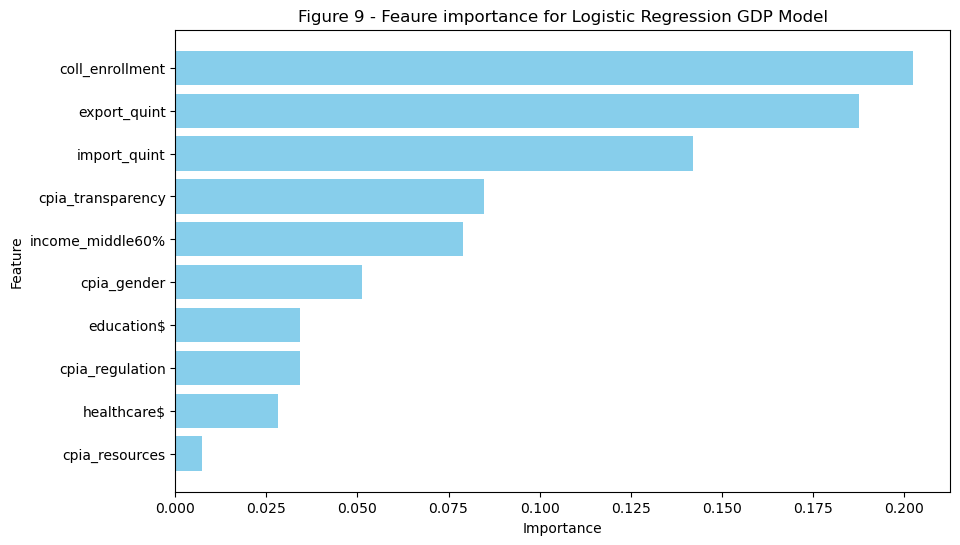

In [160]:
'''
Develop an importance_df and display importance of each feature
'''

best_model = grid_search.best_estimator_
coefficients = best_model.named_steps['log_reg'].coef_
poly_feature_names = best_model.named_steps['poly'].get_feature_names_out(input_features=feature_names)
coef_df = pd.DataFrame(coefficients, columns=poly_feature_names)
coef_df = coef_df.T
coef_df = coef_df.rename(columns={0: 'weight'})
coef_df['magnitude'] = coef_df['weight'].abs()
coef_df_sorted = coef_df.sort_values(by='magnitude', ascending=False)
coef_df_sorted.reset_index(inplace=True)
coef_df_sorted = coef_df_sorted.rename(columns={'index': 'Feature'})
sum_of_coef = coef_df_sorted['magnitude'].sum()
coef_df_sorted['Importance'] = coef_df_sorted['magnitude']/ sum_of_coef
coef_df_sorted = coef_df_sorted[~coef_df_sorted['Feature'].str.contains('1')]
coef_df_sorted = coef_df_sorted[['Feature', 'Importance']]

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 9 - Feaure importance for Logistic Regression GDP Model')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

**Figure Observations:** Secondary education enrollment, and both trade related variables, show significantly more influence (impact) on GDP in this model than the remaining variables.

[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3ciii-model2-gdp'></a>
#### 3ciii. Data modelling execution  (Decision Tree model of GDP variable)


In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=21)


### Initialize model
clf = DecisionTreeClassifier(random_state=21)

### setup parameter grid
param2 = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid = GridSearchCV(estimator=clf, param_grid=param2, cv=5, n_jobs=-1)

### Train the model
grid.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid.best_estimator_.predict(X_test)
y_test_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print('Summary 11 - Performance metrics for the best Decision Tree model')
print(f'Best parameters: {grid.best_params_}')
print(f'Best cross-validation-score: {grid.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')

Summary 11 - Performance metrics for the best Decision Tree model
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation-score: 0.8923913259131402
Accuracy on the test set : 0.8844221105527639
Precision on the test set : 0.8681318681318682
AUC on the test set : 0.8944571865443425


**Summary Observations:** The Accuracy of this model is 0.89, with a Precision score of 0.87 (a 13% chance of falsely predicting High GDP), and an AUC score of 0.89.  This model does not take into consideration linearity in the way Regression does. This model has better prediction ability than the Regression model

[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3civ-importance2-gdp'></a>
#### 3civ. Data modelling execution (Most important feature variables from Decision Tree GDP model)

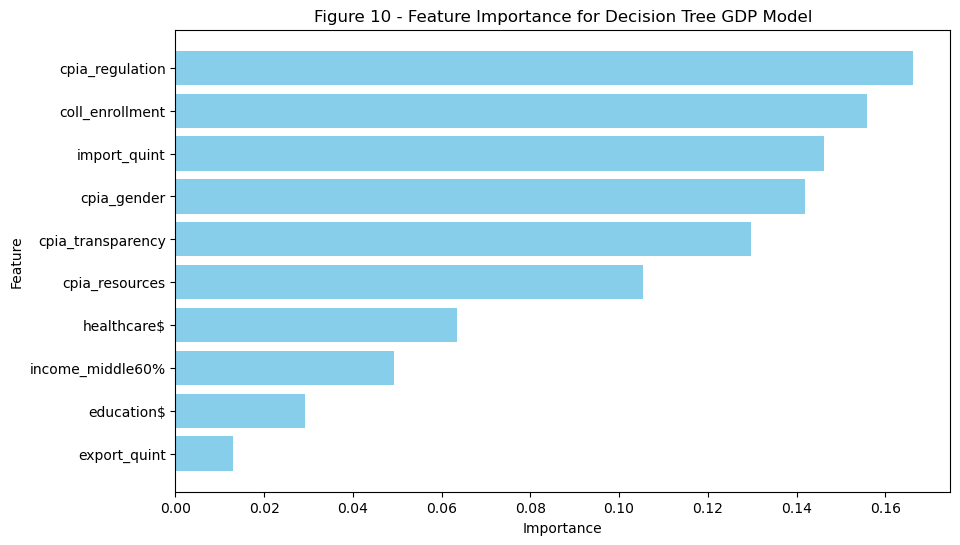

In [162]:
### get best estimator
best_model = grid.best_params_

### Initialize the Decision Tree with best params
best_clf = DecisionTreeClassifier(**best_model, random_state=21)

### Train the model
best_clf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 10 - Feature Importance for Decision Tree GDP Model')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

**Figure Observations:** CPIA assessments, import value, and college enrollment hold the most impact on this model. The differences between them are marginal compared to the regression model

[Return to Table of Contents](#1c.-Table-of-Contents)    

<a id='3cv-model3-gdp'></a>
#### 3cv. Data modelling execution (Random Forest model of GDP variable)

In [163]:
from sklearn.ensemble import RandomForestClassifier



### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=44)


### Initialize model
clf_rf = RandomForestClassifier(random_state=44)

### setup parameter grid
param3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid3 = GridSearchCV(estimator=clf_rf, param_grid=param3, cv=5, n_jobs=-1)

### Train the model
grid3.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid3.best_estimator_.predict(X_test)
y_test_pred_proba = grid3.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print('Summary 12 - Performance metrics for the best Random Forest Model')
print(f'Best parameters: {grid3.best_params_}')
print(f'Best cross-validation-score: {grid3.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')

Summary 12 - Performance metrics for the best Random Forest Model
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation-score: 0.9125310001388808
Accuracy on the test set : 0.9346733668341709
Precision on the test set : 0.90625
AUC on the test set : 0.9785816035816036


**Summary Observations:** The Accuracy of this model is 0.93, with a Precision score of 0.91 (a 9% chance of falsely predicting High GDP given the feature variables), and an AUC score of 0.98.  This model has the highest prediction ability

[Return to Table of Contents](#1c.-Table-of-Contents)    

<a id='3cvi-importance3-gdp'></a>
#### 3cvi. Data modelling execution (Most important feature variables from Random Forest GDP model)

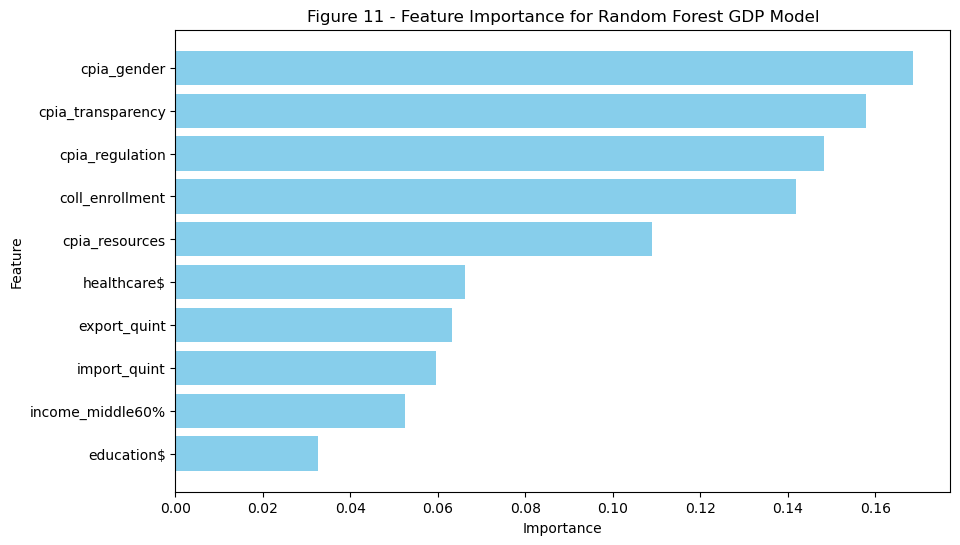

In [164]:
'''
Importance of each feature
'''
### get best estimator
best_model = grid3.best_params_

### Initialize the Decision Tree with best params
best_clf_rf = RandomForestClassifier(**best_model, random_state=21)

### Train the model
best_clf_rf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf_rf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_df2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)

### Creat a plot to show importance of each feature
plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 11 - Feature Importance for Random Forest GDP Model')

### Display plot of feature importance
plt.gca().invert_yaxis()
plt.show()

**Figure Observations:** The cpia assessements, and coll_enrollment have the highest impact on GDP in the Decision Tree model. They as a collective appear to have significantly more impact on the model than the other variables

[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3cvii-rank-gdp'></a>
#### 3cvii. Data modelling execution (Average ranking of feature variables across GDP models)
Because the Decision Tree and Random Forest models where similar in GDP prediction ability. The Team thought it would be informative to average the feature importance impact across both of those models.

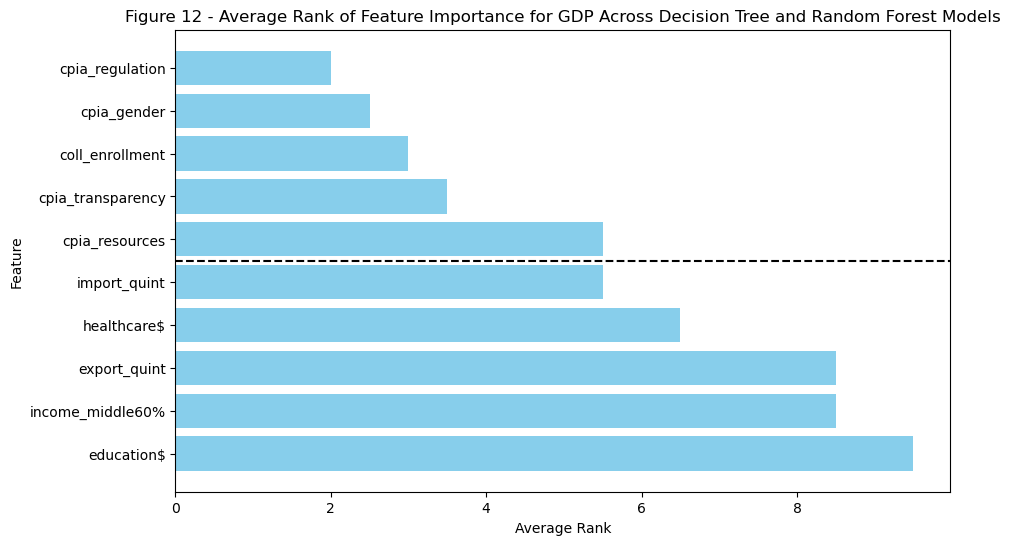

In [165]:
'''
Merge the different importance dfs and calculate plot the average Rank
'''
### Calculate and add rank for ea models results
importance_df['Rank'] = importance_df['Importance'].rank(ascending=False)
importance_df2['Rank'] = importance_df2['Importance'].rank(ascending=False)


### merge importance dfs in combined df
importance_combined = pd.merge(importance_df2, importance_df, on='Feature', how='inner')

### Calculate average rank
importance_combined['Avg_Rank'] = (importance_combined['Rank_x'] + importance_combined['Rank_y'])/2
importance_combined = importance_combined.sort_values(by='Avg_Rank')

plt.figure(figsize=(10, 6))
plt.barh(importance_combined['Feature'], importance_combined['Avg_Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.ylabel('Feature')
plt.title('Figure 12 - Average Rank of Feature Importance for GDP Across Decision Tree and Random Forest Models')
plt.gca().invert_yaxis()
plt.axhline(y=4.5, color='black', linestyle='--')
plt.show()

**Figure Observations:** When you average the importance rank of the Decision Tree, and Random Forest model, CPIA assessments, and college enrollment end up in the top five features. This is shared by the Random Forest model even though the order of importance is different. The Random Forest model was the strongest predictor of GDP. The top four features are also the same for both the average rank and Random Forest model

[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3cviii-model1-pov'></a>
#### 3cviii. Data modelling execution (Logistic Regression model of Poverty variable)

In [166]:
### Capture feature names before turning df into an array
feature_names_pov = features_pov.columns

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pov, y_pov, test_size=0.2, random_state=100)

### Need to create a pipeline in order to combine polynomial features with logistic regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression())
])

### Define parameter grid for grid search
param_grid = {
    'log_reg__C': [0.1, 1, 10, 100],
    'log_reg__solver': ['liblinear', 'saga'],
    'log_reg__penalty': ['l1', 'l2'],
    'poly__degree': [1]
}

### Initialize gridsearchcv with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

### Perform gridsearch
grid_search.fit(X_train, y_train)

### Display best paramaters and cross val score
print('Summary 13 - Performance metrics for the best Logistic Regression model for poverty feature variables')
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation-score: {grid_search.best_score_}')

### Make predictions in order to get predictions for evaluations
y_test_pred = grid_search.best_estimator_.predict(X_test)
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display Summary Statistics

print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')

Summary 13 - Performance metrics for the best Logistic Regression model for poverty feature variables
Best parameters: {'log_reg__C': 1, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear', 'poly__degree': 1}
Best cross-validation-score: 0.7538039215686275
Accuracy on the test set : 0.6984126984126984
Precision on the test set : 0.7222222222222222
AUC on the test set : 0.7304526748971193


**Summary Observations:** All of the measures for this model are lower than previous models. Accuracy has a score of 0.70, Precision score has a score of 0.72 (28% chance of falsely predicting High Income given the feature variables). AUC has a score of 0.73

[Return to Table of Contents](#1c.-Table-of-Contents)    
<a id='3cix-importance1-pov'></a>
#### 3cix. Data modelling execution (Most important feature variables from Logistic Regression Poverty model)

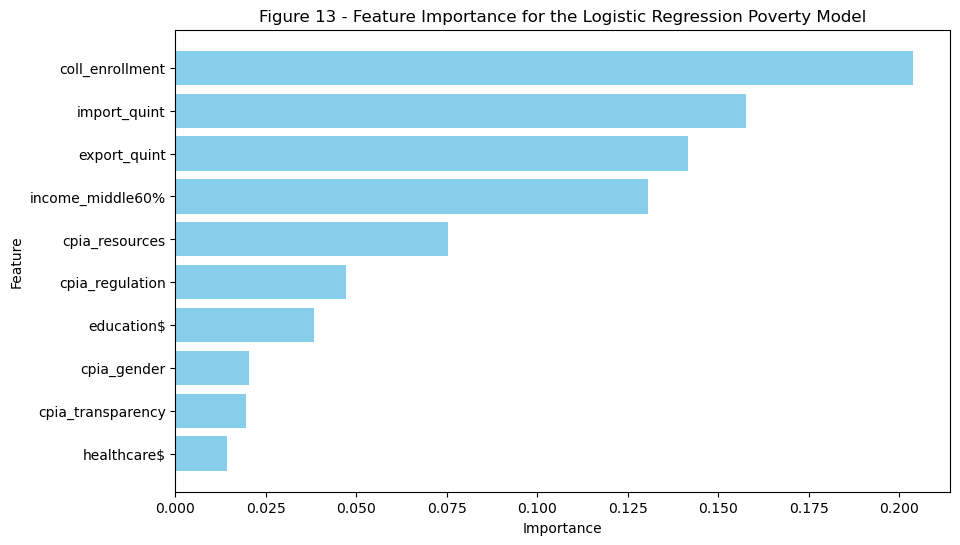

In [170]:
'''
Develop an importance_df and display importance of each feature
'''

best_model = grid_search.best_estimator_
coefficients = best_model.named_steps['log_reg'].coef_
poly_feature_names = best_model.named_steps['poly'].get_feature_names_out(input_features=feature_names_pov)
importance_povll = pd.DataFrame(coefficients, columns=poly_feature_names)
importance_povll = importance_povll.T
importance_povll = importance_povll.rename(columns={0: 'weight'})
importance_povll['magnitude'] = importance_povll['weight'].abs()
importance_povll_sorted = importance_povll.sort_values(by='magnitude', ascending=False)
importance_povll_sorted.reset_index(inplace=True)
importance_povll_sorted = importance_povll_sorted.rename(columns={'index': 'Feature'})
importance_povll_sum = importance_povll_sorted['magnitude'].sum()
importance_povll_sorted['Importance'] = importance_povll_sorted['magnitude']/ importance_povll_sum
importance_povll_sorted = importance_povll_sorted[~importance_povll_sorted['Feature'].str.contains('1')]
importance_povll_sorted = importance_povll_sorted[['Feature', 'Importance']]

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(importance_povll_sorted['Feature'], importance_povll_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 13 - Feature Importance for the Logistic Regression Poverty Model')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

**Figure Observations:** Trade variables, college enrollment, and size of the middle class show most important for this model

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='3cx-model2-pov'></a>
#### 3cx. Data modelling execution (Decision Tree model of Poverty variable)

In [168]:
### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pov, y_pov, test_size=0.2, random_state=200)


### Initialize model
clf = DecisionTreeClassifier(random_state=200)

### setup parameter grid
param2 = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid = GridSearchCV(estimator=clf, param_grid=param2, cv=5, n_jobs=-1)

### Train the model
grid.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid.best_estimator_.predict(X_test)
y_test_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print('Summary 13 - Performance metrics for the best Decision Tree model of poverty feature variable')
print(f'Best parameters: {grid.best_params_}')
print(f'Best cross-validation-score: {grid.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')


Summary 13 - Performance metrics for the best Decision Tree model of poverty feature variable
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation-score: 0.7894117647058823
Accuracy on the test set : 0.7619047619047619
Precision on the test set : 0.8260869565217391
AUC on the test set : 0.8621212121212121


**Summary Observations:** This model is a slightly better predictor than the Logistic Regression model for Poverty. Accuracy has a score of 0.76, Precision score has a score of 0.82 (18% chance of falsely predicting High Income given the feature variables). AUC has a score of 0.86

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='3cxi-importance2-pov'></a>
#### 3cxi. Data modelling execution (Most important feature variables from Decision Tree Poverty model)

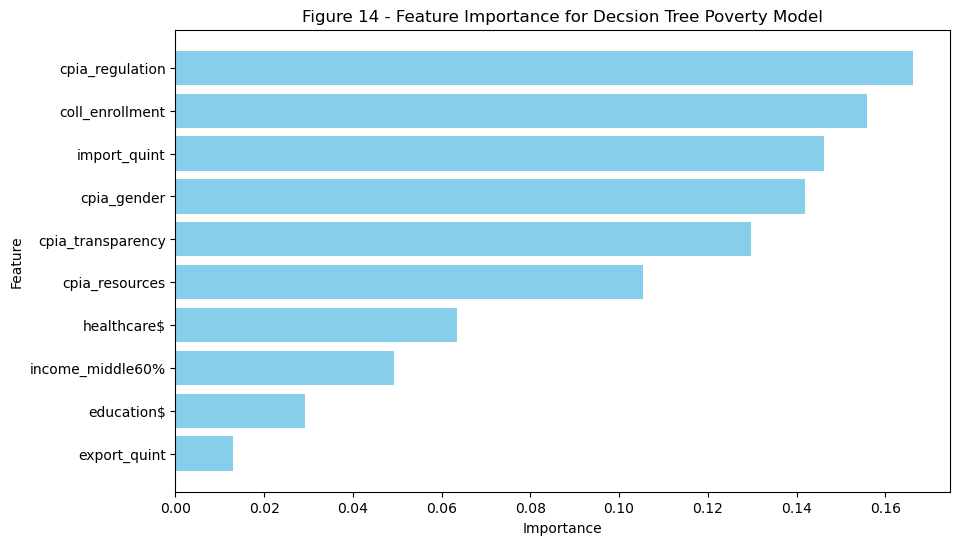

In [169]:
### get best estimator
best_model = grid.best_params_

### Initialize the Decision Tree with best params
best_clf = DecisionTreeClassifier(**best_model, random_state=21)

### Train the model
best_clf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_povdt = pd.DataFrame({'Feature': feature_names_pov, 'Importance': feature_importances})
importance_povdt = importance_df.sort_values(by='Importance', ascending=False)

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(importance_povdt['Feature'], importance_povdt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 14 - Feature Importance for Decsion Tree Poverty Model')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

**Figure Observations:** The CPIA variables, regulation, gender, and transparency where in the top five features for impotance, along with college enrollment, and import value

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='3cxii-model3-pov'></a>
#### 3cxii. Data modelling execution (Random Forest model of Poverty variable)

In [171]:
from sklearn.ensemble import RandomForestClassifier



### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pov, y_pov, test_size=0.2, random_state=300)


### Initialize model
clf_rf = RandomForestClassifier(random_state=300)

### setup parameter grid
param3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid3 = GridSearchCV(estimator=clf_rf, param_grid=param3, cv=5, n_jobs=-1)

### Train the model
grid3.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid3.best_estimator_.predict(X_test)
y_test_pred_proba = grid3.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print('Summary 14 - Performance metrics for the best Random Forest model of poverty feature variable')
print(f'Best parameters: {grid3.best_params_}')
print(f'Best cross-validation-score: {grid3.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')

Summary 14 - Performance metrics for the best Random Forest model of poverty feature variable
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation-score: 0.8051764705882354
Accuracy on the test set : 0.8095238095238095
Precision on the test set : 0.75
AUC on the test set : 0.9017094017094017


**Summary Observations:** This model is a worst predictor of the positive class but is more accurate overall. Accuracy has a score of 0.81, Precision score has a score of 0.75 (25% chance of falsely predicting High Income given the feature variables). AUC has a score of 0.90

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='3cxiii-importance3-pov'></a>
#### 3cxiii. Data modelling execution (Most important feature variables from Random Forest Poverty Model)

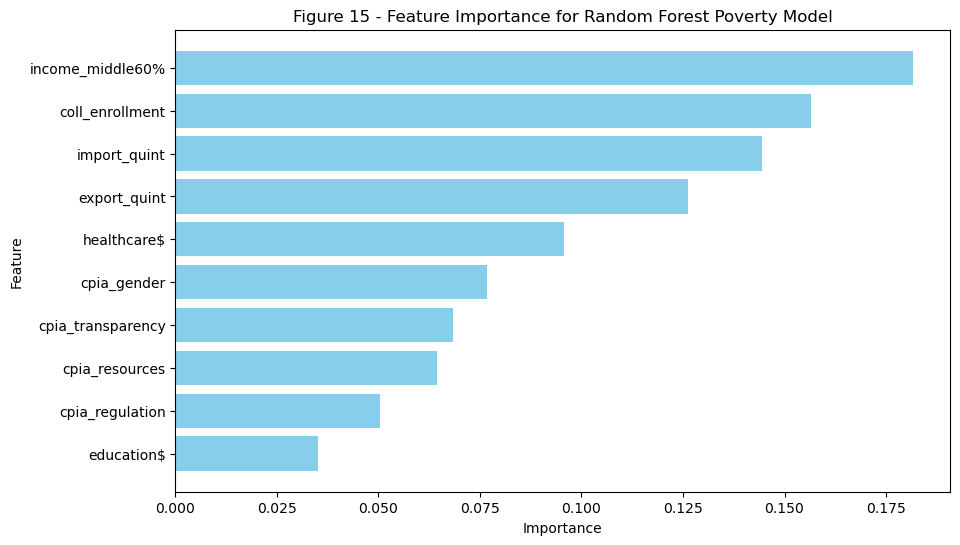

In [172]:
'''
Importance of each feature
'''
### get best estimator
best_model = grid3.best_params_

### Initialize the Decision Tree with best params
best_clf_rf = RandomForestClassifier(**best_model, random_state=300)

### Train the model
best_clf_rf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf_rf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_povrf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_povrf = importance_povrf.sort_values(by='Importance', ascending=False)

### Creat a plot to show importance of each feature
plt.figure(figsize=(10, 6))
plt.barh(importance_povrf['Feature'], importance_povrf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Figure 15 - Feature Importance for Random Forest Poverty Model')

### Display plot of feature importance
plt.gca().invert_yaxis()
plt.show()

**Figure Observations:** The most important factor for this model was middle class size, which was the only time it appeared promiently. Trade values (imports & exports) and college enrollment round up the top five factors.

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='3d-implications'></a>
### 3d. Model's Practical Implications
In this section, the relationships between the target variables and the ‘critical feature’ variables (Those features of highest importance from the stongest models) were explored in more detail. With scatter plots,  the strength, shape, and direction of the relationship were observed. Section 3di plots the top four most important variables from the Random Forest GDP model. Section 3dii plots the top four most important variables from the Decision Tree Poverty model

[Return to Table of Contents](#1c.-Table-of-Contents) 
<a id='3di-practical-review-gdp'></a>     
#### 3di. Model implication (Plot of GDP versus critical feature variables)

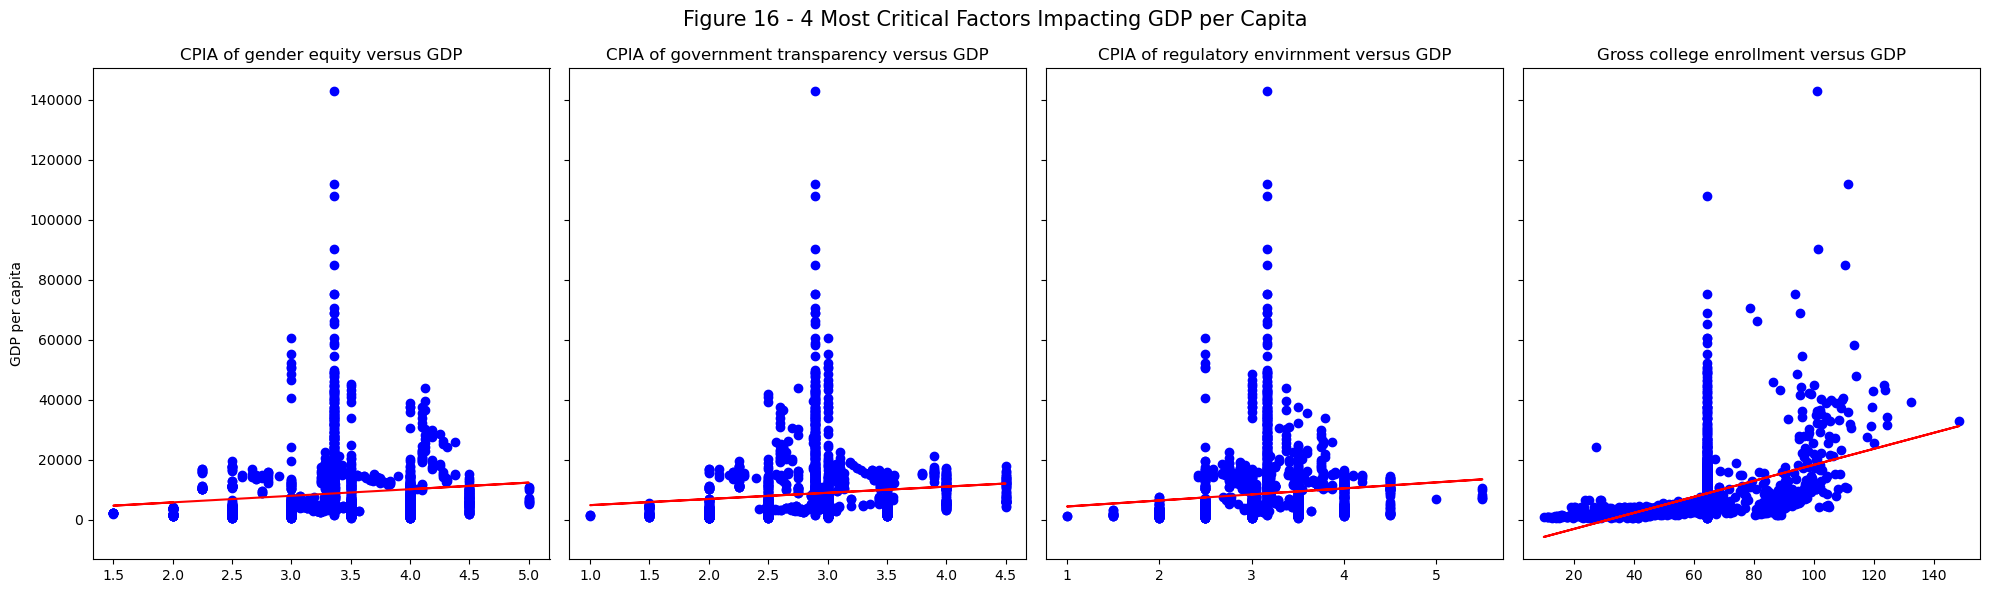

In [173]:
##### Create a series of scatter plots that share the same y axis
fig, axes = plt.subplots(1, 4, figsize =(20, 6), sharey=True)

#### Assign crtical variables
yg = df_gdp3['gdp']

#### create a list of series top 5 most important features
x_vars = [
    df_gdp3['cpia_gender'],
    df_gdp3['cpia_transparency'],
    df_gdp3['cpia_regulation'],
    df_gdp3['coll_enrollment']
]

#### Create a list of graph titles
titles = [
    'CPIA of gender equity versus GDP',
    'CPIA of government transparency versus GDP',
    'CPIA of regulatory envirnment versus GDP',
    'Gross college enrollment versus GDP'
]
    
#### Create a scatter plot with a trend line    
for ax, xg, title in zip(axes, x_vars, titles):
    ax.scatter(xg, yg, color='b', label='Data')
    
    #### fit a trend line
    m, b = np.polyfit(xg, yg, 1) #### 1 for linear regression
    ax.plot(xg, m*xg + b, color='r', label='Trend Line')
    
    ax.set_title(title)
    ax.set_label('X Values')
    
axes[0].set_ylabel('GDP per capita') #### Set the y axis label only on the first plot
plt.suptitle('Figure 16 - 4 Most Critical Factors Impacting GDP per Capita', fontsize=15)
plt.tight_layout()
plt.show()

**Figure Observations:** All three of the CPIA variable are similar in shape with the trend bar indicating a similar mild positive relationship. The imputed data can be seen on each of the three plots as a vertically stacked series of data points. Those data points are related to the intances with the highest GDP per capita within their respective plots. College enrollment versus GDP appears to be have a curvilinear relationship with a trend line suggesting a moderately strong relationship to GDP per capita. The imputed data is apparent on this plot was well but doesnt appear to be as prominent or impactful

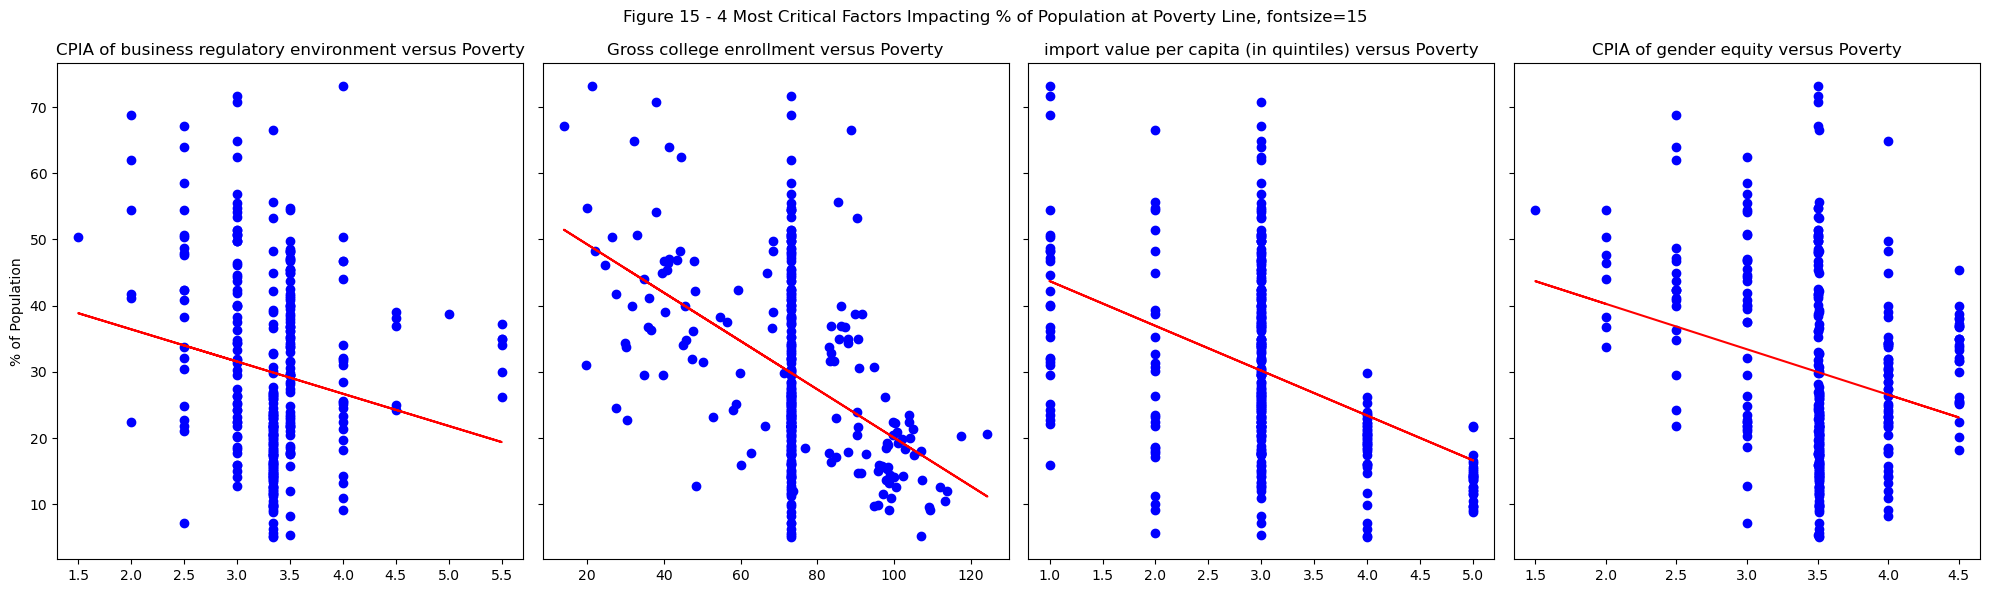

In [113]:
##### Create a series of scatter plots that share the same y axis
fig, axes = plt.subplots(1, 4, figsize =(20, 6), sharey=True)

#### Assign crtical variables
yg = df_pov3['%pov']

#### create a list of series top 5 most important features
x_vars = [
    df_pov3['cpia_regulation'],
    df_pov3['coll_enrollment'],
    df_pov3['import_quint'],
    df_pov3['cpia_gender']
]

#### Create a list of graph titles
titles = [
    'CPIA of business regulatory environment versus Poverty',
    'Gross college enrollment versus Poverty',
    'import value per capita (in quintiles) versus Poverty',
    'CPIA of gender equity versus Poverty'
]
    
#### Create a scatter plot with a trend line    
for ax, xg, title in zip(axes, x_vars, titles):
    ax.scatter(xg, yg, color='b', label='Data')
    
    #### fit a trend line
    m, b = np.polyfit(xg, yg, 1) #### 1 for linear regression
    ax.plot(xg, m*xg + b, color='r', label='Trend Line')
    
    ax.set_title(title)
    ax.set_label('X Values')
    
axes[0].set_ylabel('% of Population') #### Set the y axis label only on the first plot
plt.suptitle('Figure 17 - 4 Most Critical Factors Impacting % of Population at Poverty Line, fontsize=15')
plt.tight_layout()
plt.show()

**Figure Observations:** All four of the plots comparing critical feature variables to %Poverty, appear to be show mild to moderately strong negative relationshps. This would suggest the higher the feature variable value, the lower the % of the population at the poverty line. Imputed values appear to be embedded in the more densly vertically stacked data points.

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='3dii-practical-review-pov'></a>
#### 3dii. Model implications (Review of Povety versus critical feature variables)

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='4-results'></a>
# 4. Summary of the Results
In this section, three models were completed for both target variables GDP, and Poverty. For each model, performance measures were calculated, and the impact of each feature was plotted on a “feature importance” graph. The following is a summary of result observations for models completed.
1. For both GDP and Poverty, the Logistic Regression models performance resulted in the lowest target predictability(precision) and overall model robustness (AUC). The Precision scores for GDP and Poverty were 79% and 72%. While the AUC scores were 85% and 73% respectfully.
2. For the GDP target variable:      
    a. The Random Forest model performed best overall. This model resulte in a higher precision score than the Decision Tree model (91% versus 87%), and higher AUC score as well(98% versus 89%)     
    b. Gender equity, Regulatory environment, and Government transparency ranked in the top five most important factors for both Decision Tree and Random Forest models     
    c. The top four most important feature variables from the Random Forest model were 'cpia_gender', 'cpia_transparency', 'cpia_regulation', 'coll_enrollment'.     
    d. The same four varibles were the highest ranked when averaging feature importance rank for the two highest performing models; Random Forest, and Decision Trees

3. For the Poverty variable:     
    a. None of the model's performance scores were as high as two best performing GDP models  
    b. The Decision Tree model resulted with the highest performance scores; A precision score of 82% and an AUC score of 86% 
    c. The most important four factors for the Decision Tree model were 'cpia_regulation', 'coll_enrollment', 'import_quint', and 'cpia_gender'   
    d. The feature variables that appeared in at least two of the three models as a top four importance factor were 'coll_enrollment', 'import_quint', 'income_middle60%, and 'export_quint'   

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='5-conclusions'></a>
# 5. Conclusion
The goal of this study was to provide Country23 with data-driven insights that its parliamentary officials could use to discuss potential areas of governmental and economic policy reform. The study focused on two key target variables: Gross Domestic Product (GDP) per capita, and percentage of the population at or below the poverty level. Eleven governmental and economic based feature variables were chosen as potential predictors of these targets. In collaboration with the client, the company's analytics team uploaded, cleaned, standardized, restructured, transformed and analyzed the relevant data across multiple analytic models to drive insights. Based on the assumptions made during data preparation, and the results summarized in section four, the following conclusions were drawn:
- Gross domestic Product per capita can be predicted with a high degree of precision (87% and 91% for the best models)
- Government policies that promote transparency, equity, and business regulation along with increased secondary education enrollment positively correlate with economic health
- While CPIA assessments were strong predictors of GDP the exact nature of this relationship remains uncertain and need more in-depth study. Many high-GDP data points had missing values, which were imputed with the mean, potentially affecting this analysis
- Percentage of the population at the poverty line can be predicted but not to the same precision as GDP (75% and 82% for the best models)
- Governmental policies that promote gender equity and business regulation, increased secondary education enrollment, and import values have a negative (inverse) correlation to % poverty

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='6-recommendations'></a>
# 6. Recommendations
Based on the results and conclusions seen above in section 4 and 5 above, the following recommendations were made to Country23:
1. Contact the World Bank Group's International Development Association (IDA) which is performs and documents the 'Country Policy and Institutional Assessment’ (CPIA), and collect detailed information on the governmental policies of developed, economically healthy nations. Many of the known economically healthy nations were aggregated with one another, masking the effect of their policies on GDP and Poverty in this study
2. Benchmark the education systems and associated policies of those countries with the highest percentage of gross secondary education enrollment. Secondary education enrollment was the most consistently important variable across all models completed
3. Consider sponsoring a more comprehensive study for factors impacting % poverty due to the lack data from open-source repositories on the subject. Less than 400 rows of data were available for the study, with one third the total data missing values
    - within a follow up study include imports, along with trade balance to capture relationship of imports with exports

[Return to Table of Contents](#1c.-Table-of-Contents)      
<a id='7-thoughts'></a>
# 7. Final Thoughts
This study provided Country23 with data-driven insights into the economic and governmental factors influencing GDP per capita and poverty levels. By leveraging predictive modeling, key variables such as transparency, business regulation, gender equity, and secondary education enrollment emerged as critical indicators of economic health. While the findings offer valuable guidance for policy discussions, additional research—particularly in refining the CPIA assessment’s role and expanding data on poverty factors—could further strengthen the foundation for evidence-based decision-making. Implementing the recommendations outlined above will help Country23 refine its policy strategies and move toward sustainable economic growth and poverty reduction. By taking a data-informed approach, policymakers can drive meaningful reforms that contribute to a more prosperous and equitable future for the nation.